In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=None
pd.options.display.max_rows=150
pd.options.display.max_colwidth = None

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)

import seaborn as sns

In [2]:
df = pd.read_csv('sample_train_good_40k.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
col_desc = pd.read_csv('HomeCredit_columns_description.csv')
description = col_desc[col_desc['Table']=='application_{train|test}.csv'][['Row','Description','Special']]
description.head()

,Row,Description,Special
0,SK_ID_CURR,ID of loan in our sample,NaN
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,CODE_GENDER,Gender of the client,NaN
4,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [3]:
def get_description_of_column(col,df=description):
    return description[description['Row']==col]

In [4]:
dtypes = df.apply(lambda col: col.dtype)
null_count = df.isnull().sum()
nuniques = df.apply(lambda col:col.nunique())

df_info = pd.DataFrame({'dtypes':dtypes,'null_count':null_count,'nuniques':nuniques})
df_info.head()

,dtypes,null_count,nuniques
TARGET,int64,0,2
NAME_CONTRACT_TYPE,object,0,2
CODE_GENDER,object,0,2
FLAG_OWN_CAR,object,0,2
FLAG_OWN_REALTY,object,0,2


In [5]:
#From Statistical test, significant columns are
num_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 
            'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'HOUR_APPR_PROCESS_START',
            'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'YEARS_BUILD_AVG', 'ELEVATORS_AVG',
            'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 
            'YEARS_BUILD_MODE', 'ELEVATORS_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LIVINGAREA_MODE', 
            'APARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'ELEVATORS_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
            'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 
            'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
            'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']

cat_cols = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
            'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 
            'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_18', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
            'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 
            'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']

In [6]:
len(num_cols)

42

In [7]:
len(cat_cols)

24

#### Numerical columns

In [78]:
amt_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

num_region_cols = ['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
                'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START']

area_avg = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
            'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG']

area_mode= ['APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
            'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE']

social_circle_cols = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                      'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 
                      'AMT_REQ_CREDIT_BUREAU_YEAR']

In [51]:
(df['AMT_INCOME_TOTAL']>1e7).sum()

1

In [52]:
#lets drop this record as this outlier may add unwanted noise while boxplot
df = df[df['AMT_INCOME_TOTAL']<1e7]

In [10]:
#### Categorical columns

In [79]:
comm_cols = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE']

cat_region_cols = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY']

document_cols = ['FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_18']

gender_cols = ['CODE_GENDER']

remaining_cols1 = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                  'NAME_HOUSING_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']

remaining_cols2 = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

In [67]:
def num_vs_cat_vs_target_plot(num_cols,cat_cols):
    for num in num_cols:
        for cat in cat_cols:
            sns.catplot(data=df,x=cat,y=num,col='TARGET',kind='box').set_xticklabels(rotation=90)
            plt.show()

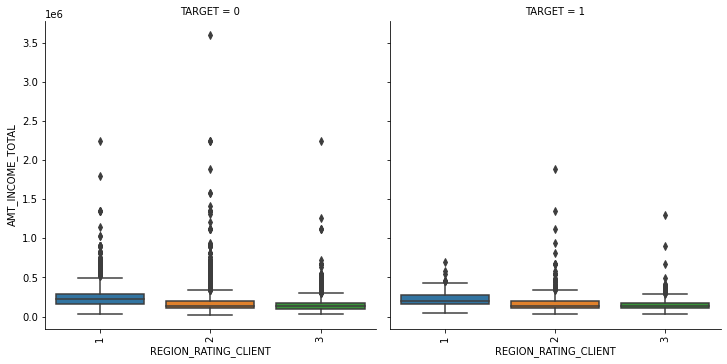

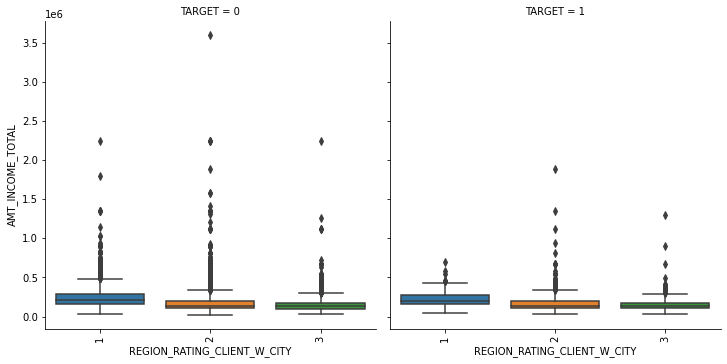

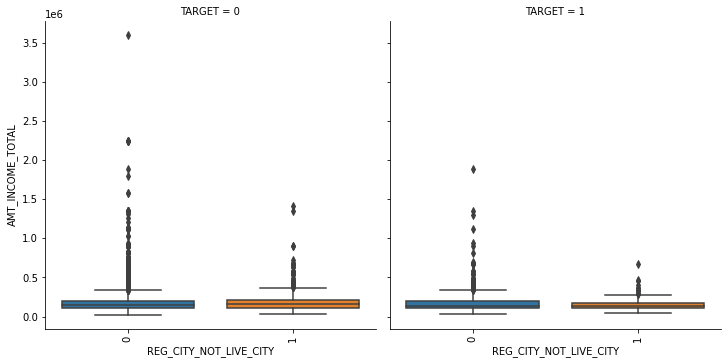

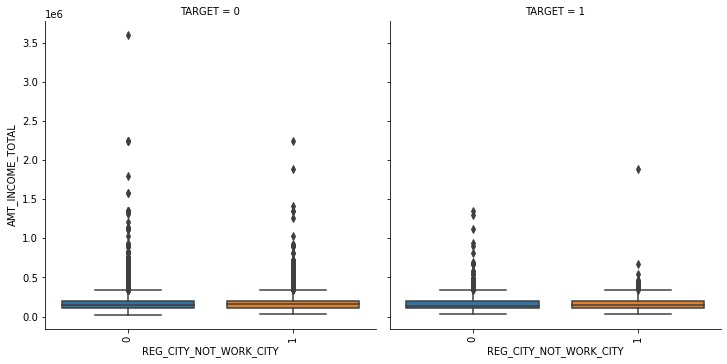

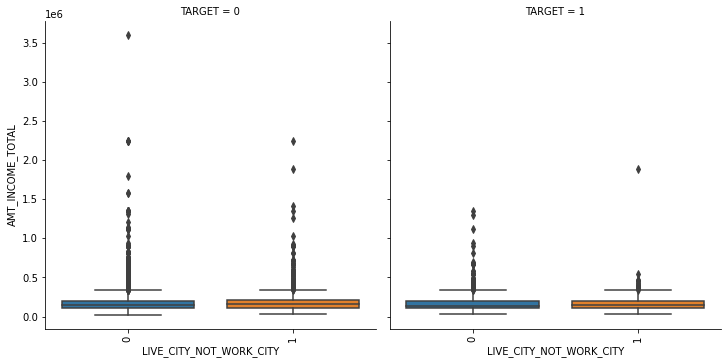

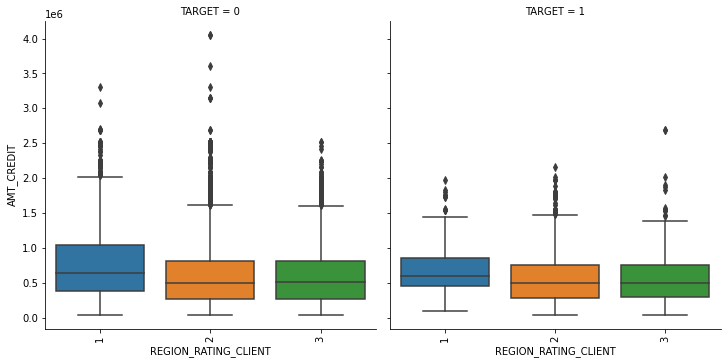

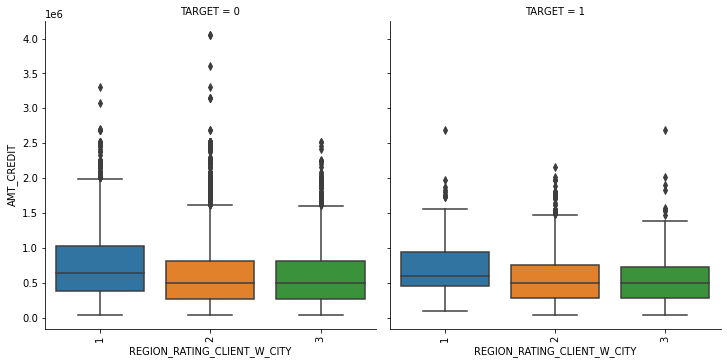

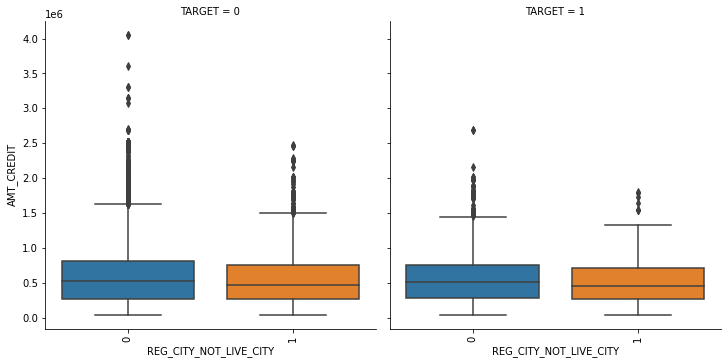

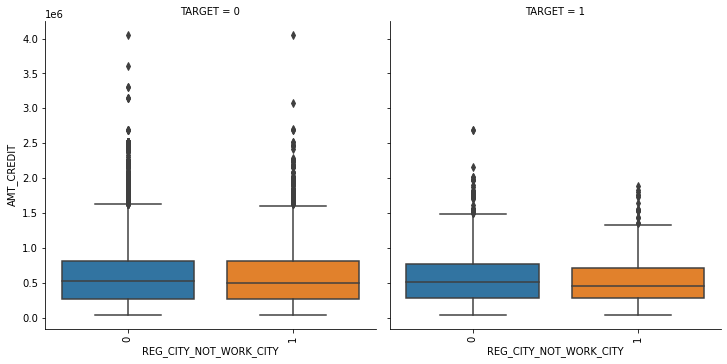

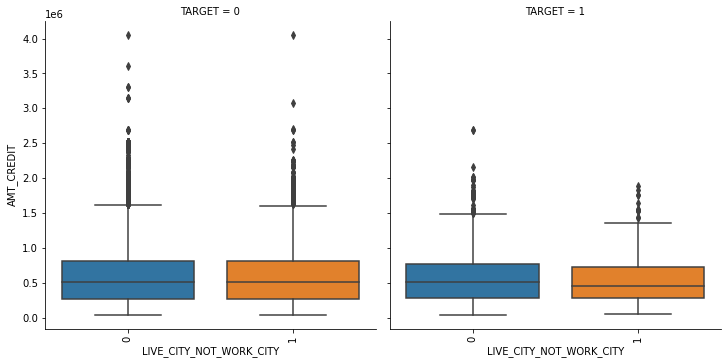

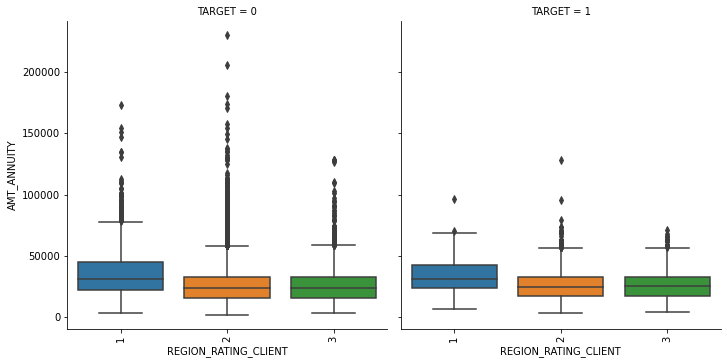

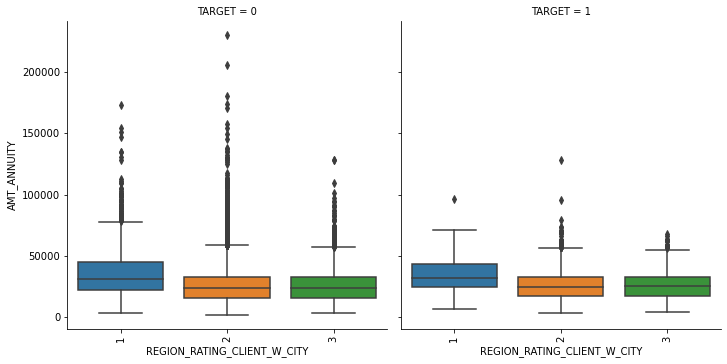

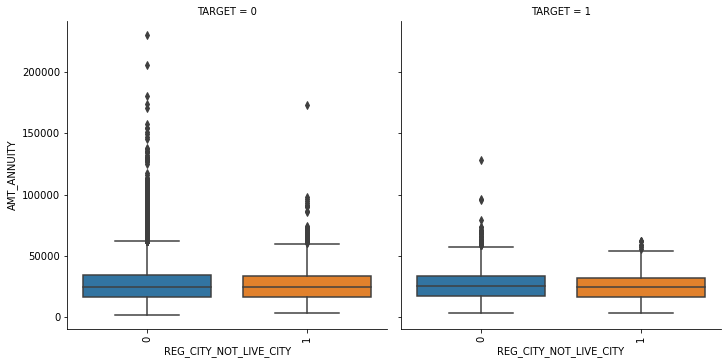

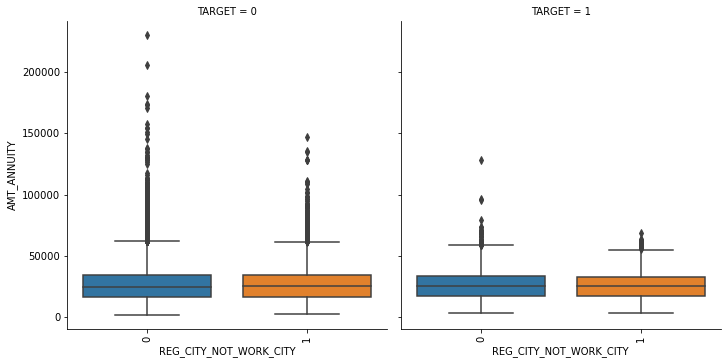

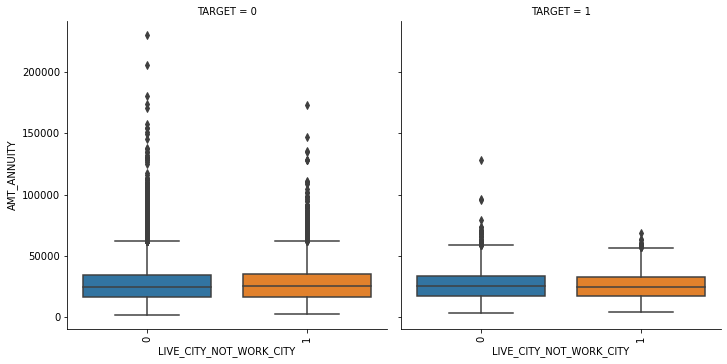

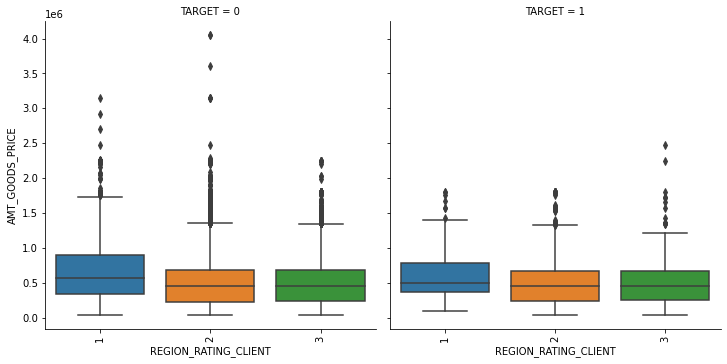

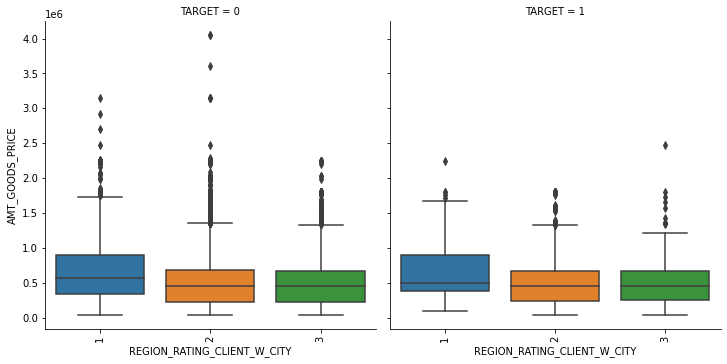

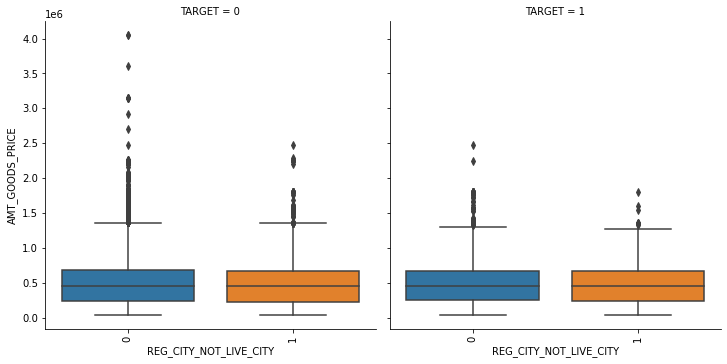

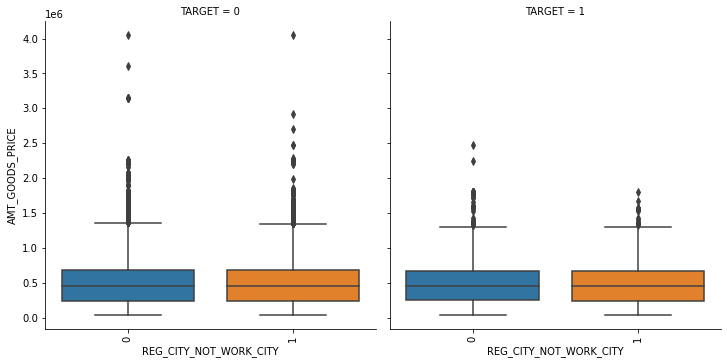

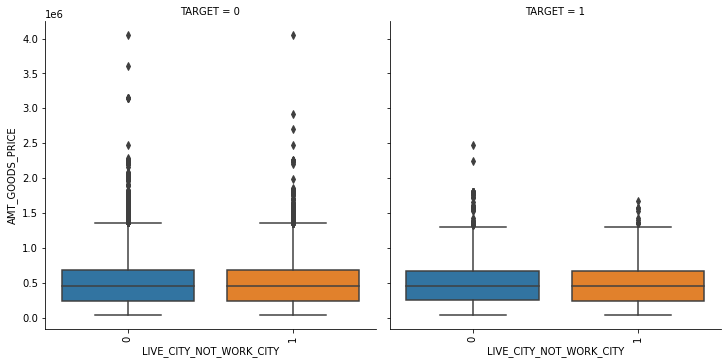

In [55]:
# Target vs amt_cols vs region_cols
num_vs_cat_vs_target_plot(amt_cols,cat_region_cols)

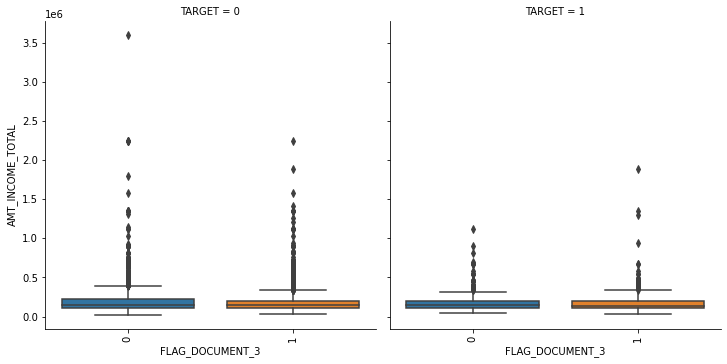

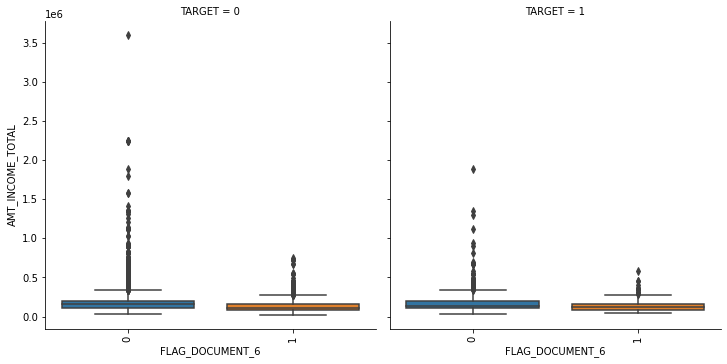

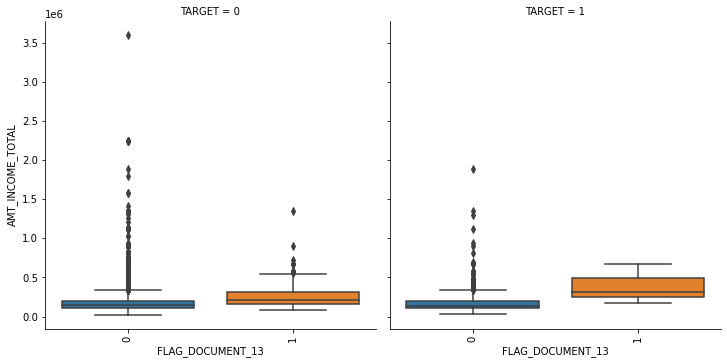

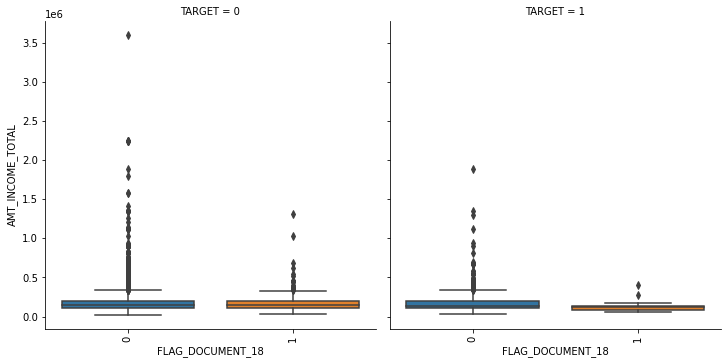

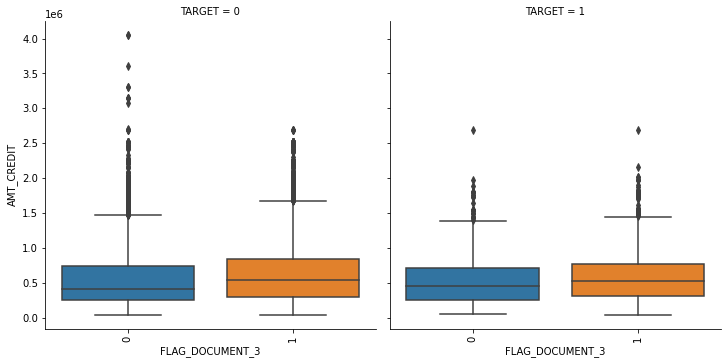

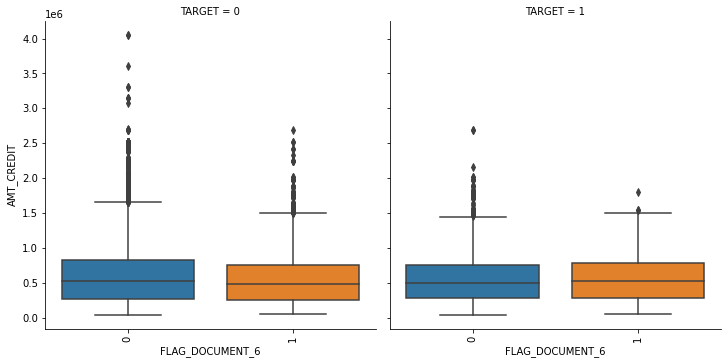

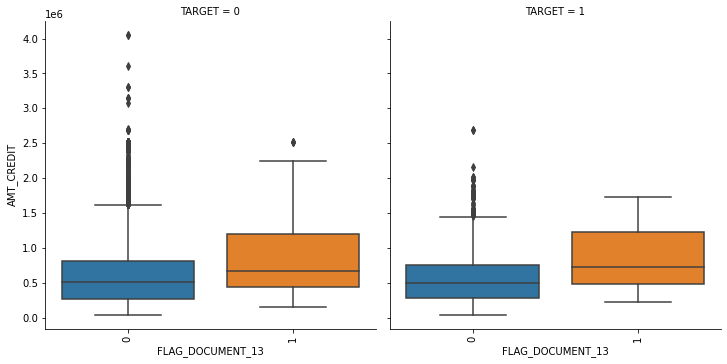

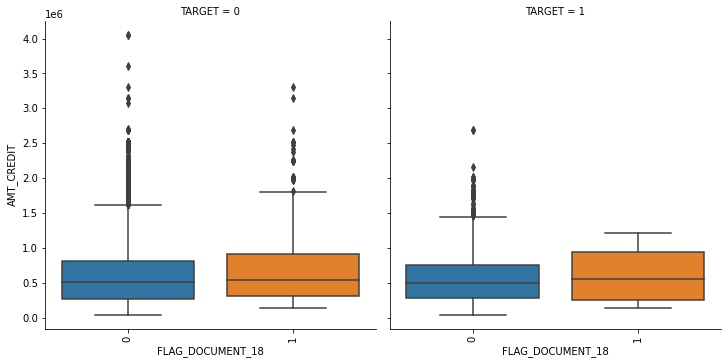

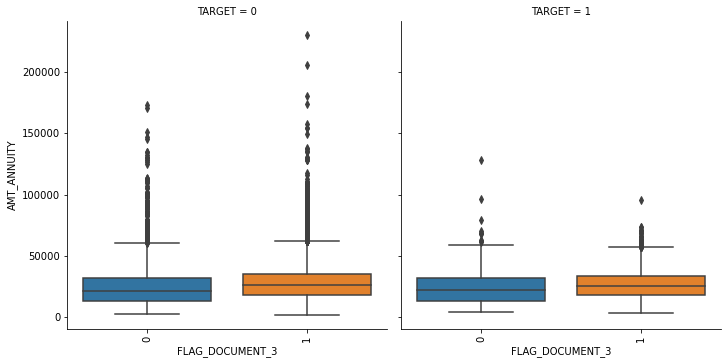

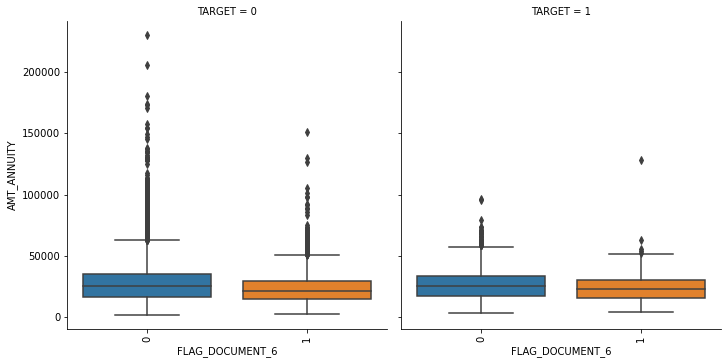

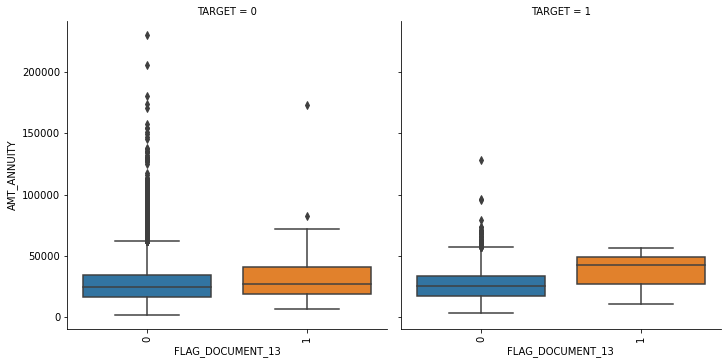

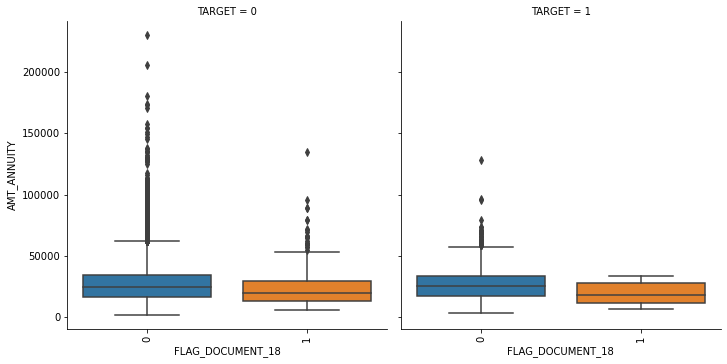

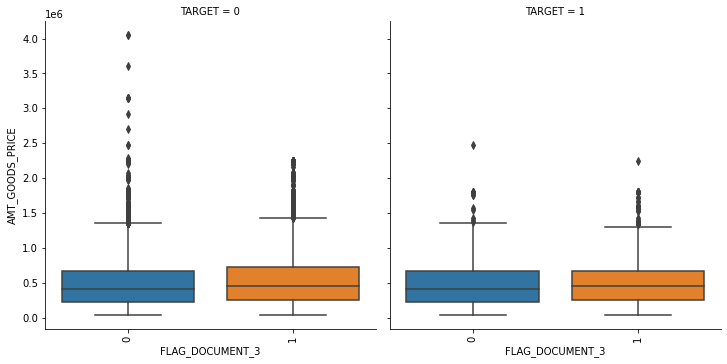

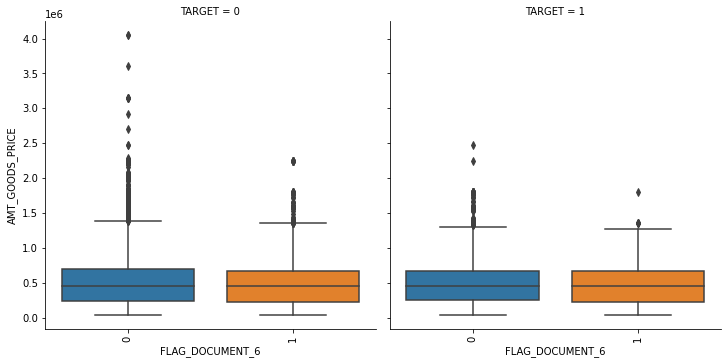

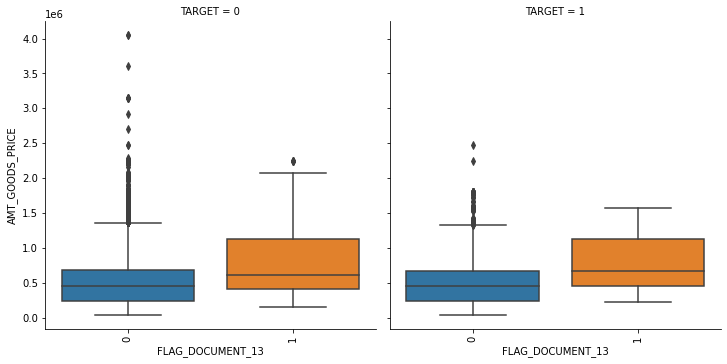

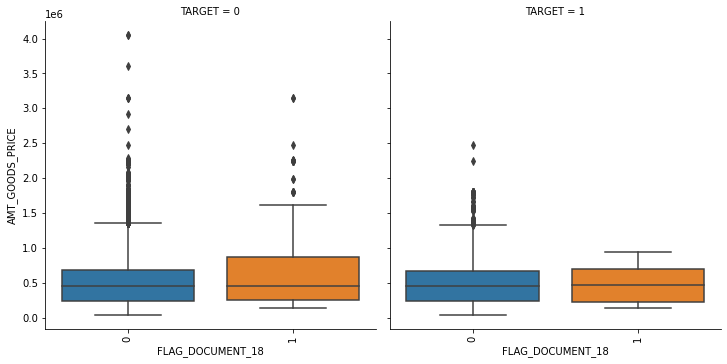

In [57]:
# Target vs amt_cols vs document_cols
num_vs_cat_vs_target_plot(amt_cols,document_cols)

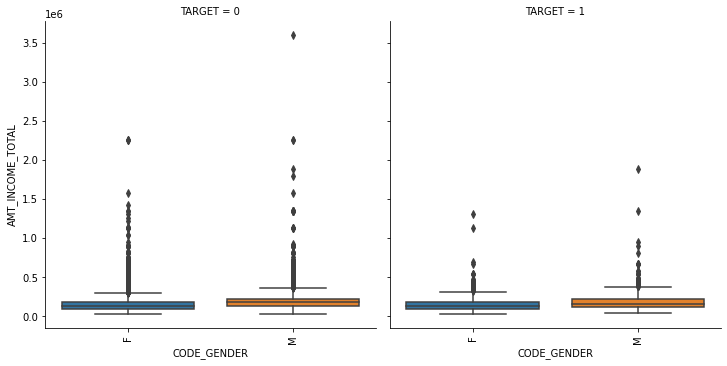

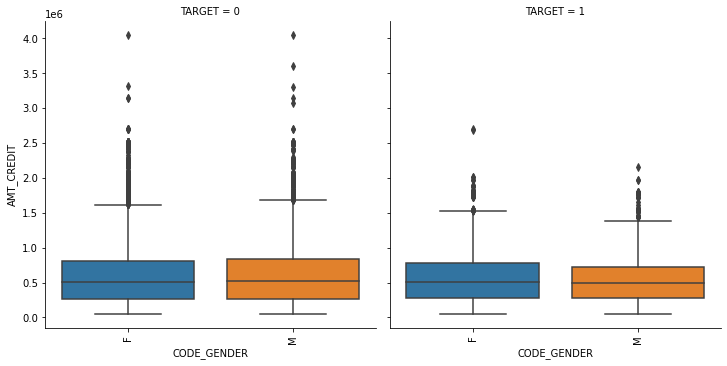

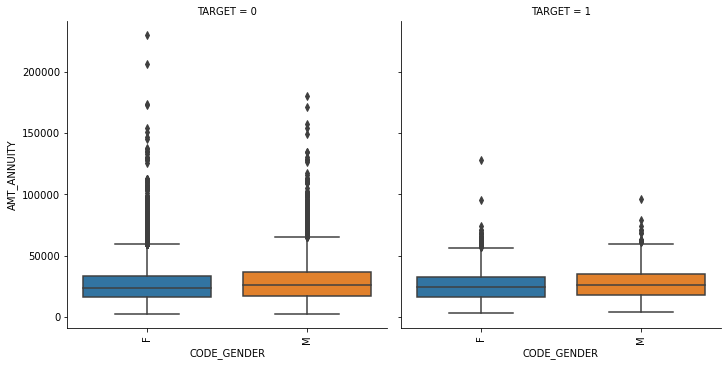

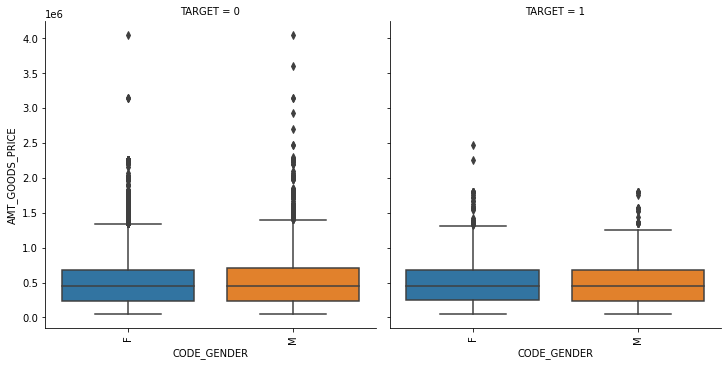

In [58]:
# Target vs amt_cols vs gender_cols
num_vs_cat_vs_target_plot(amt_cols,gender_cols)

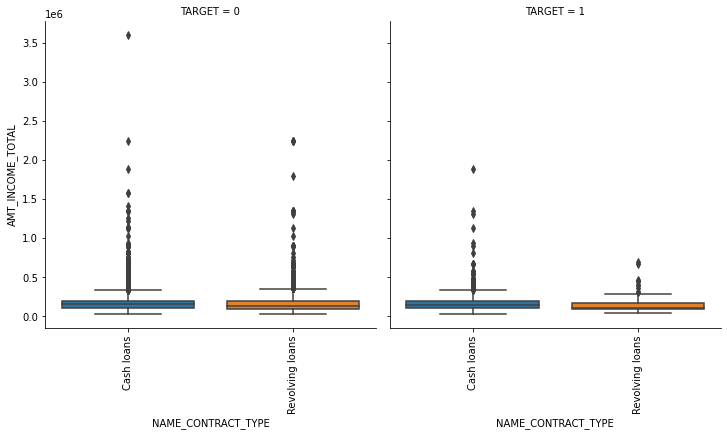

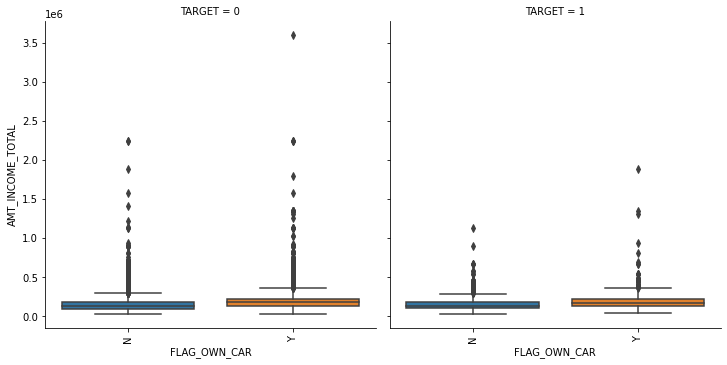

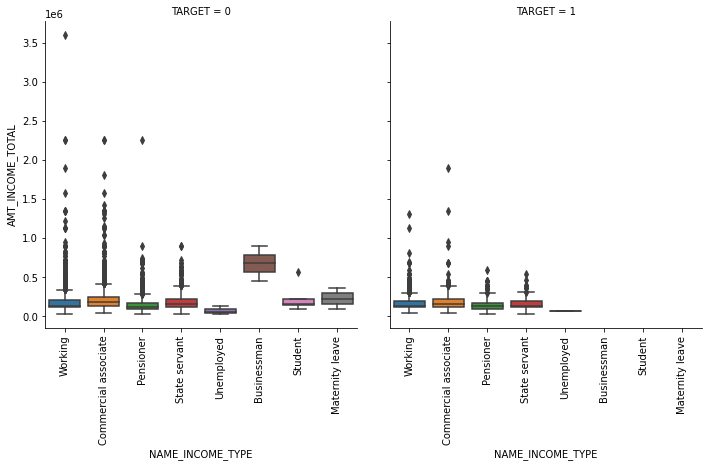

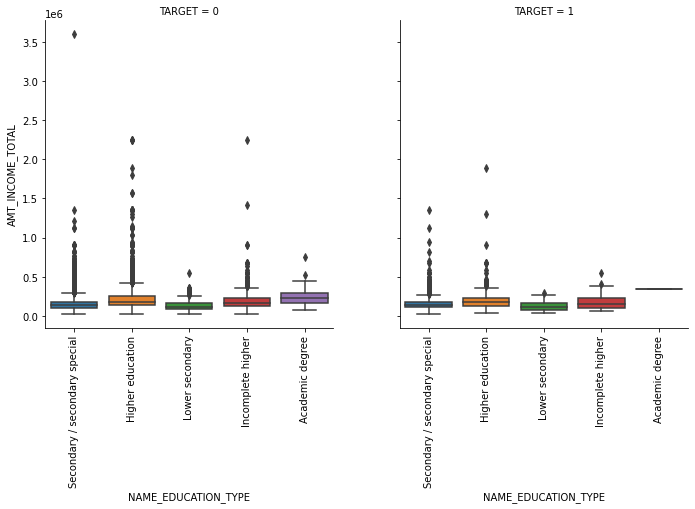

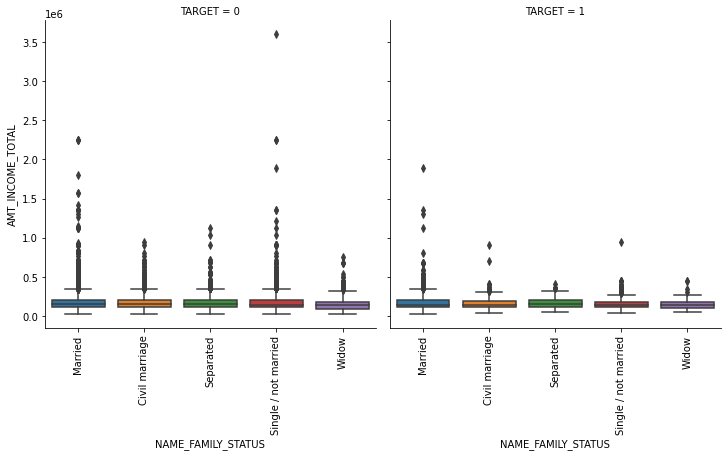

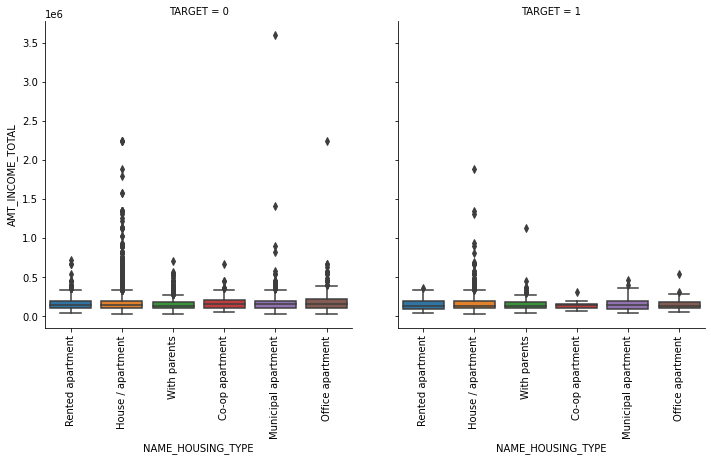

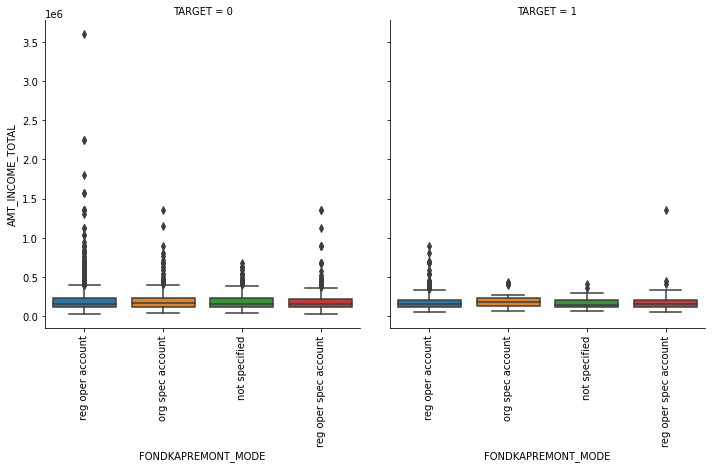

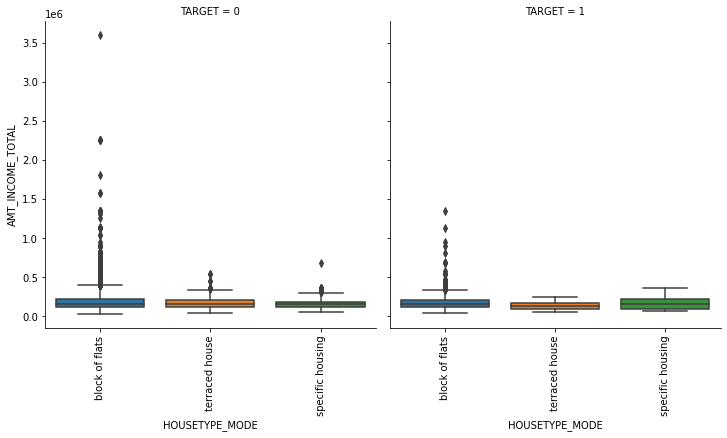

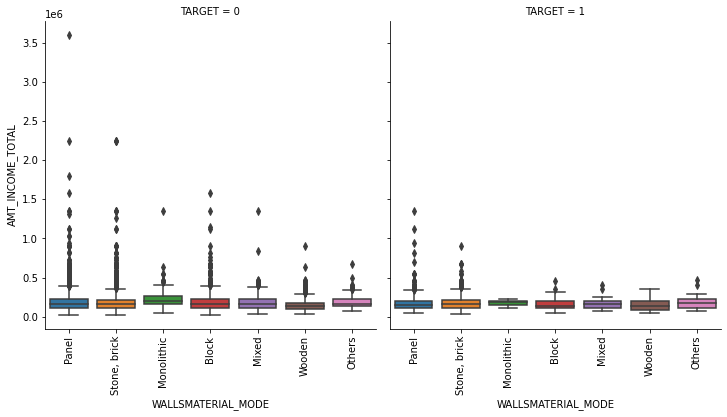

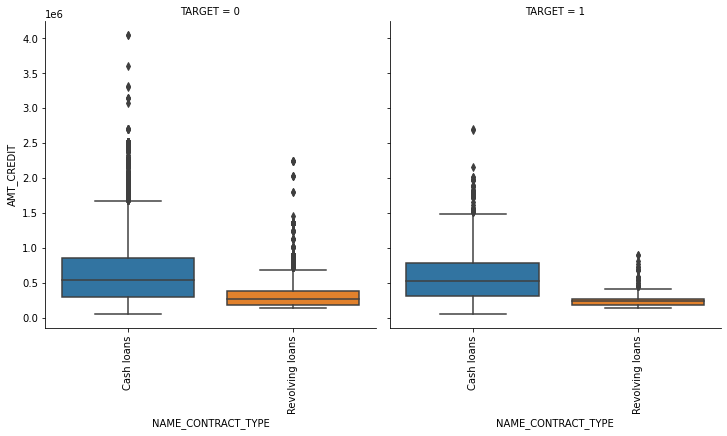

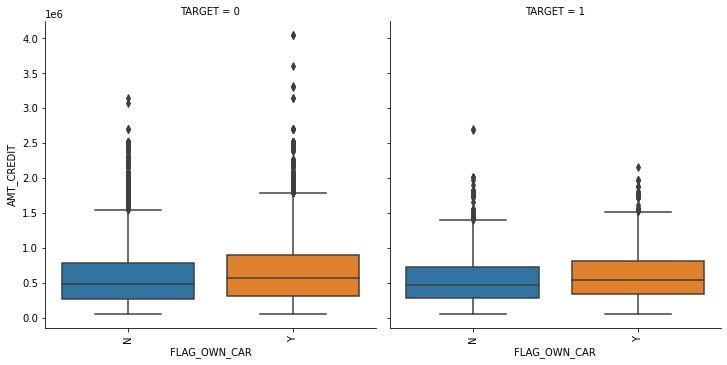

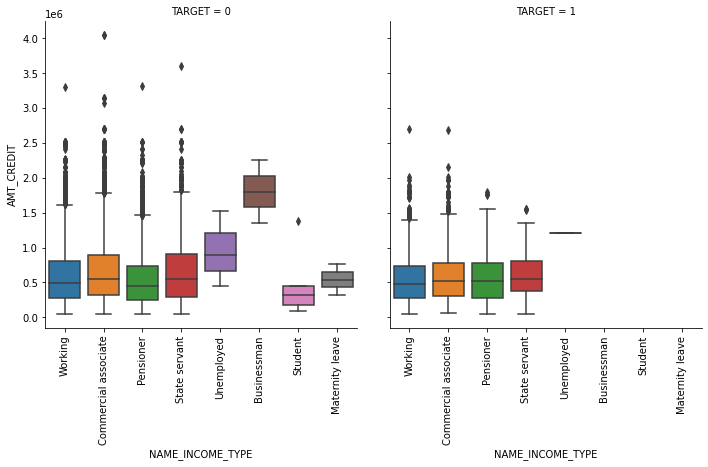

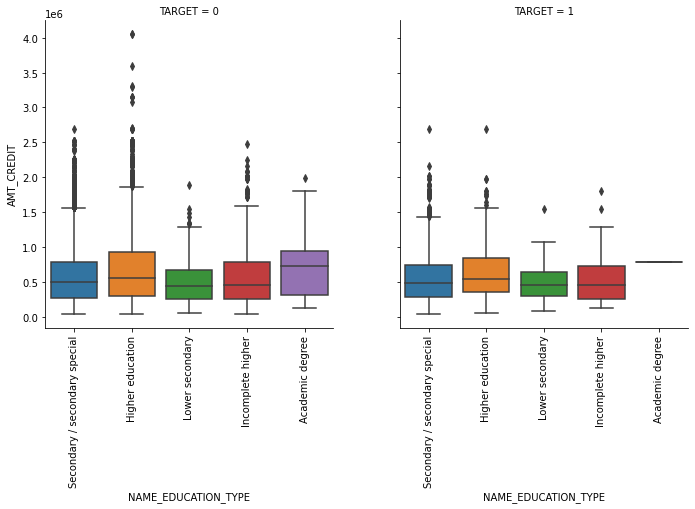

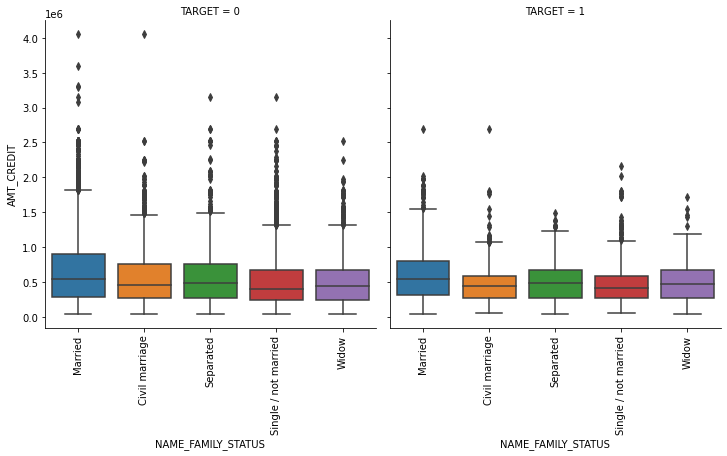

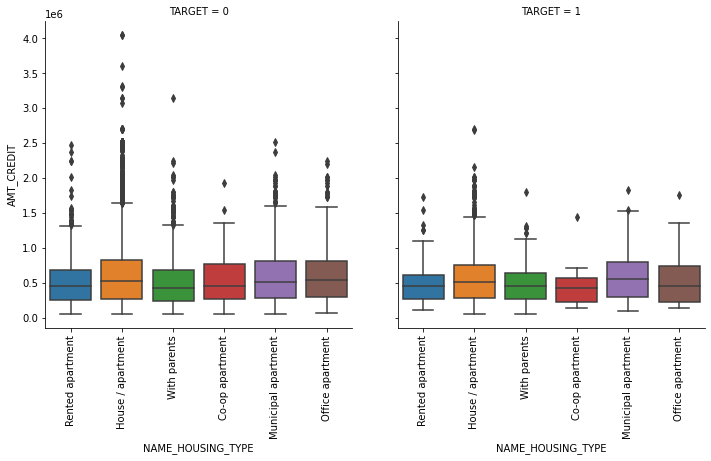

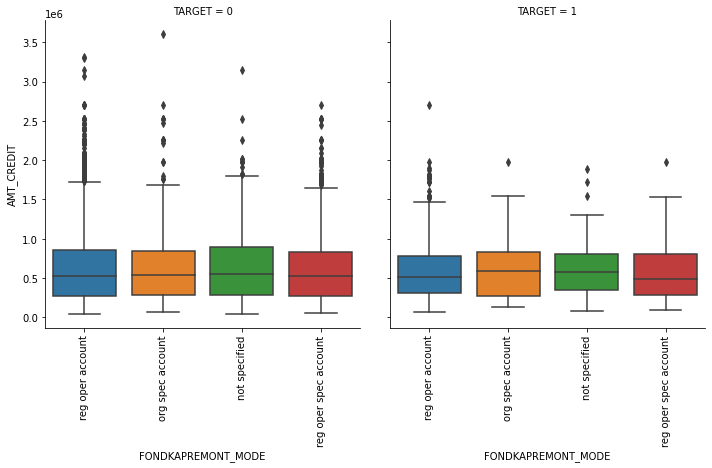

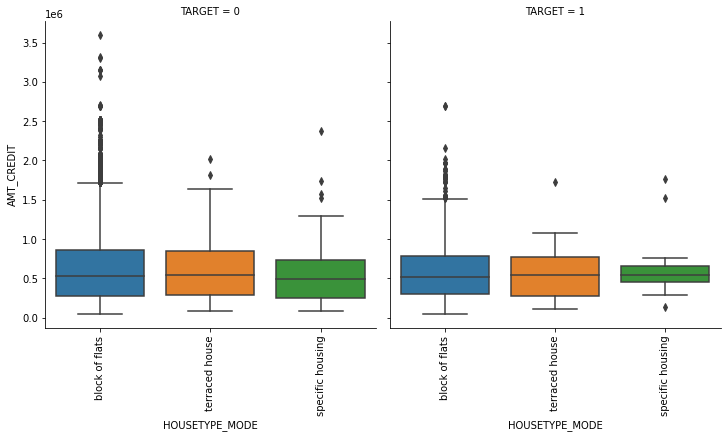

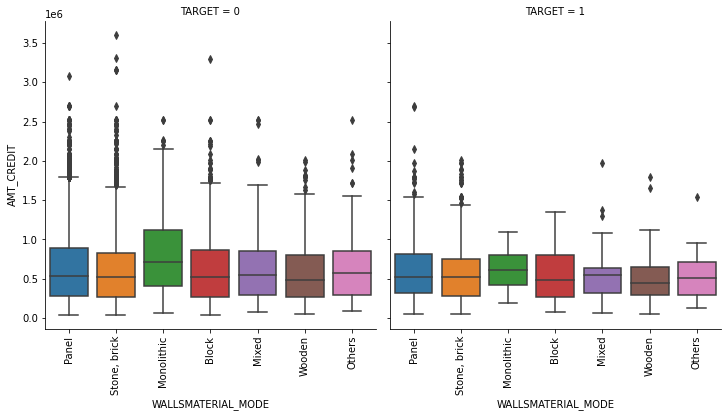

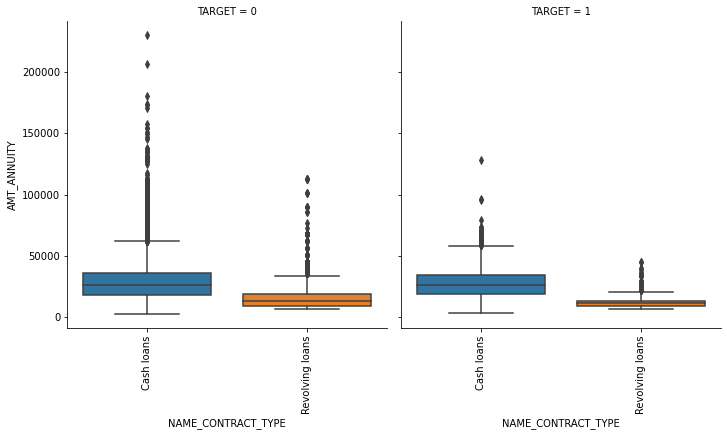

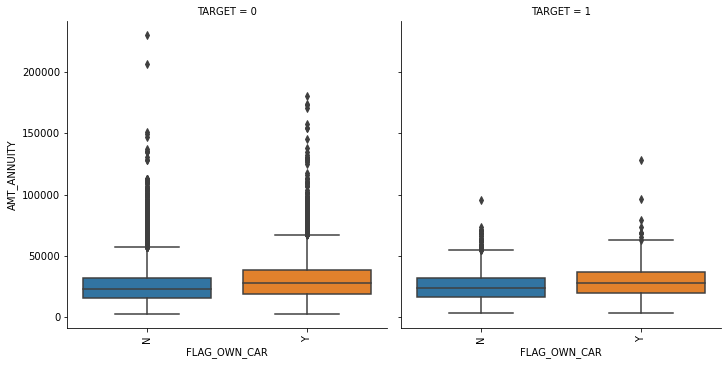

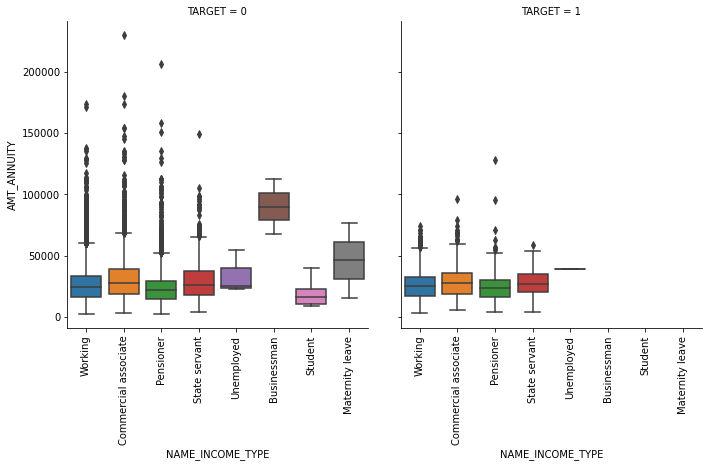

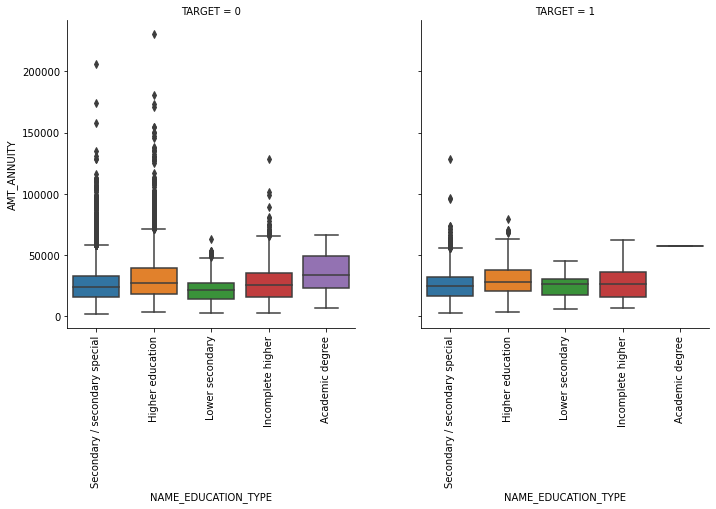

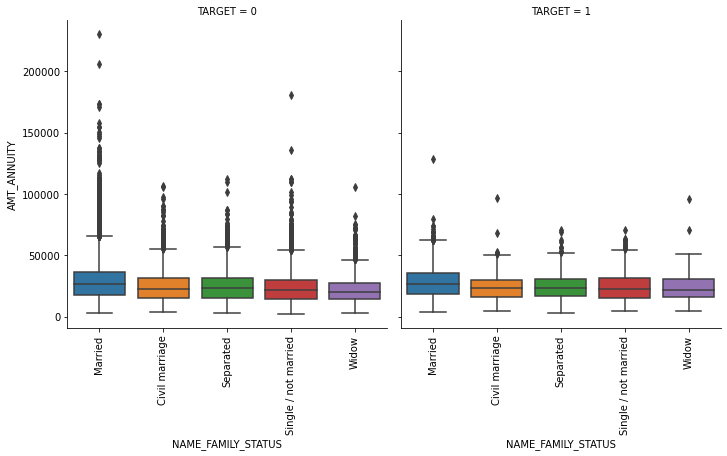

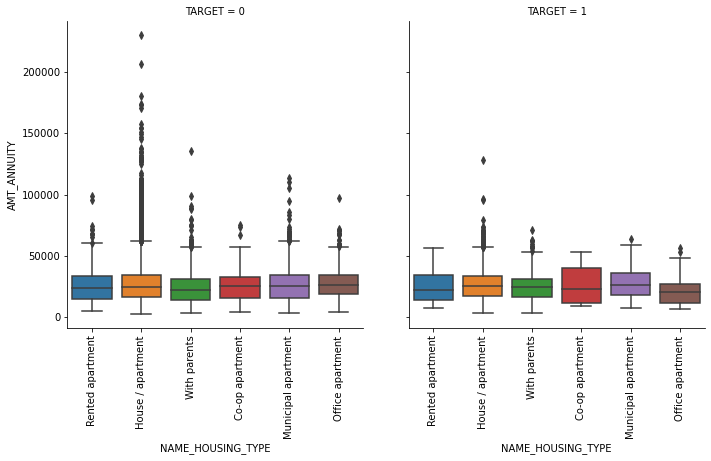

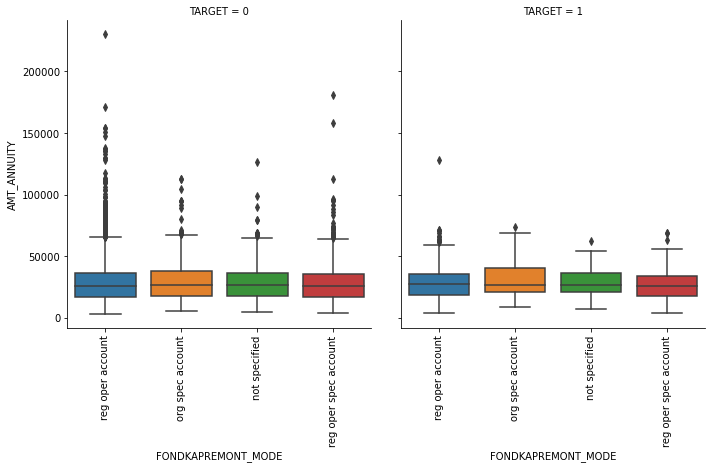

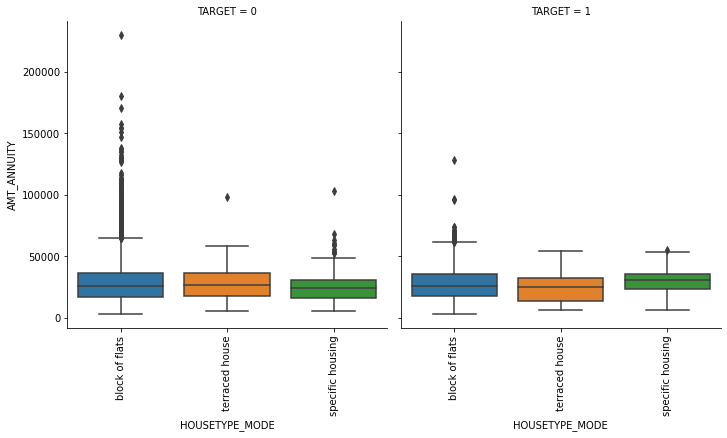

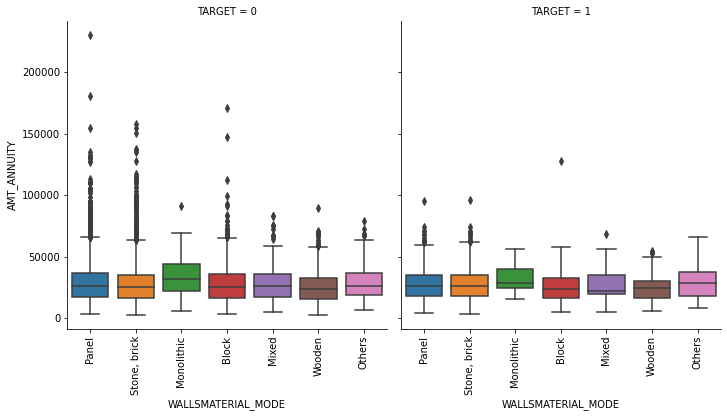

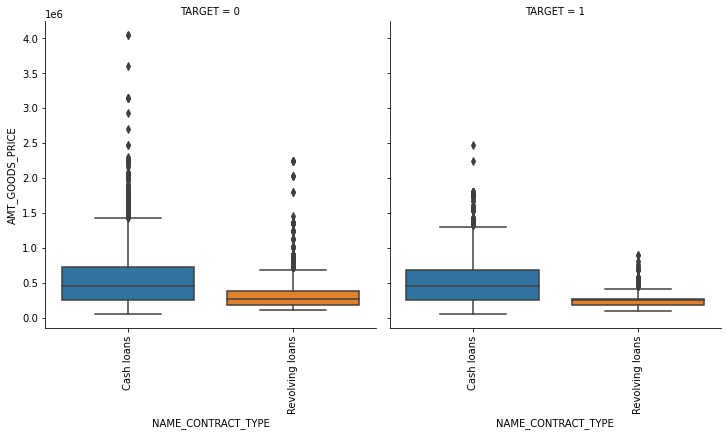

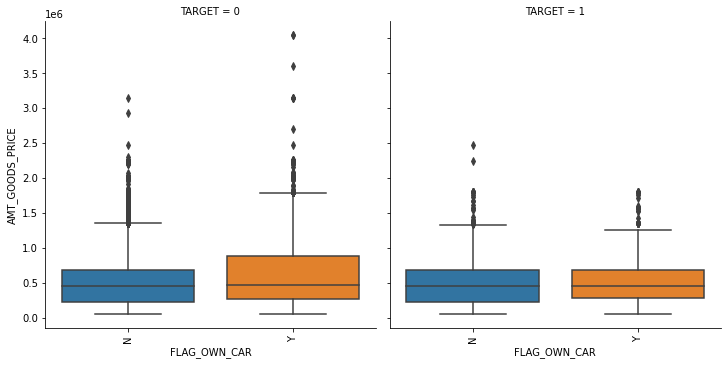

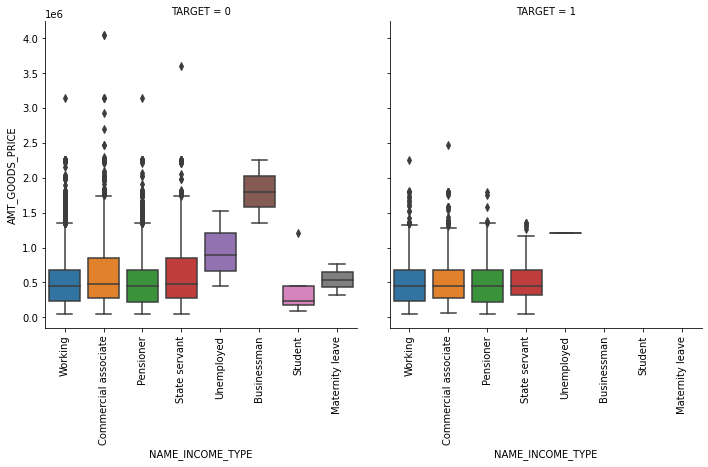

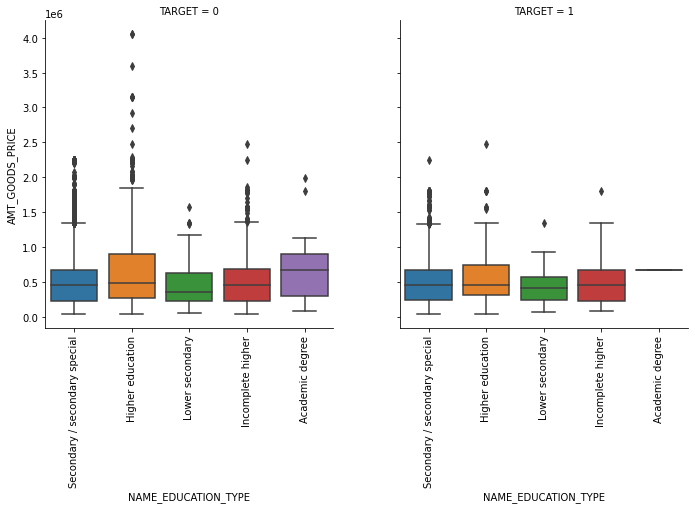

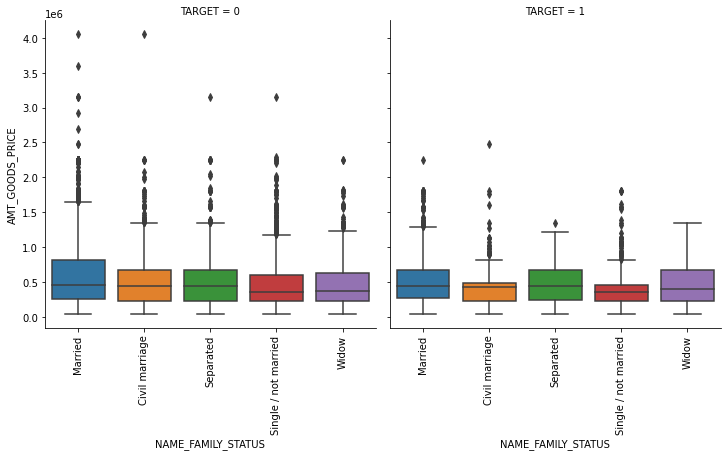

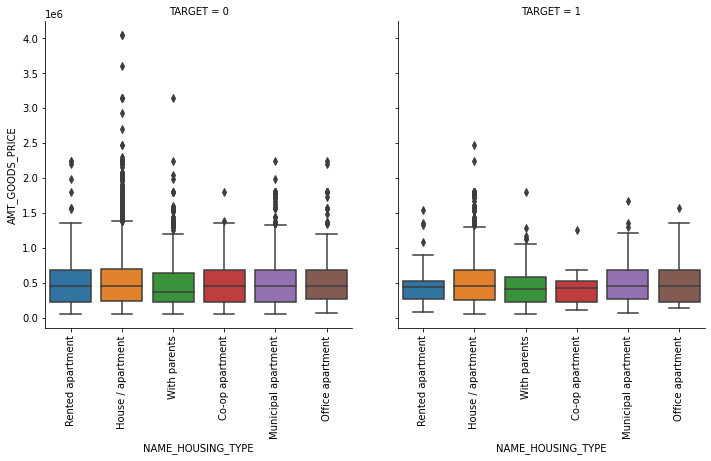

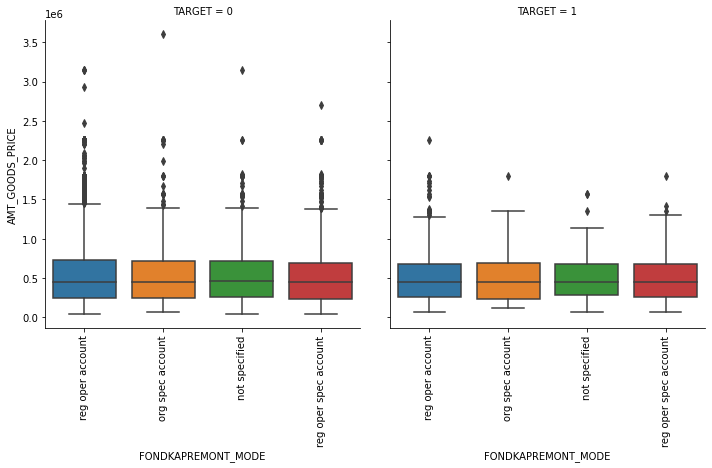

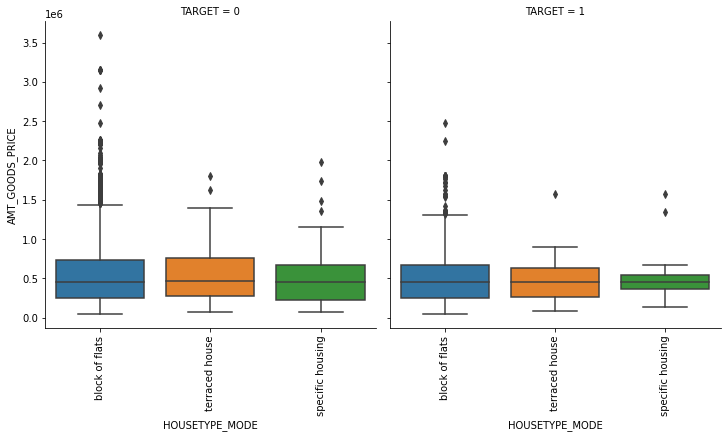

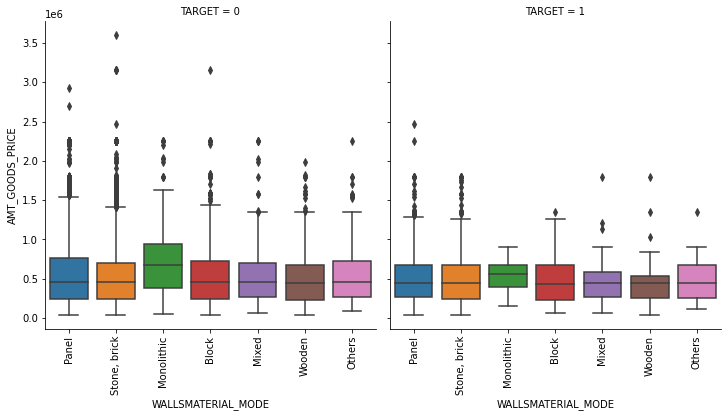

In [68]:
# Target vs amt_cols vs remaining_cols1
num_vs_cat_vs_target_plot(amt_cols,remaining_cols1)

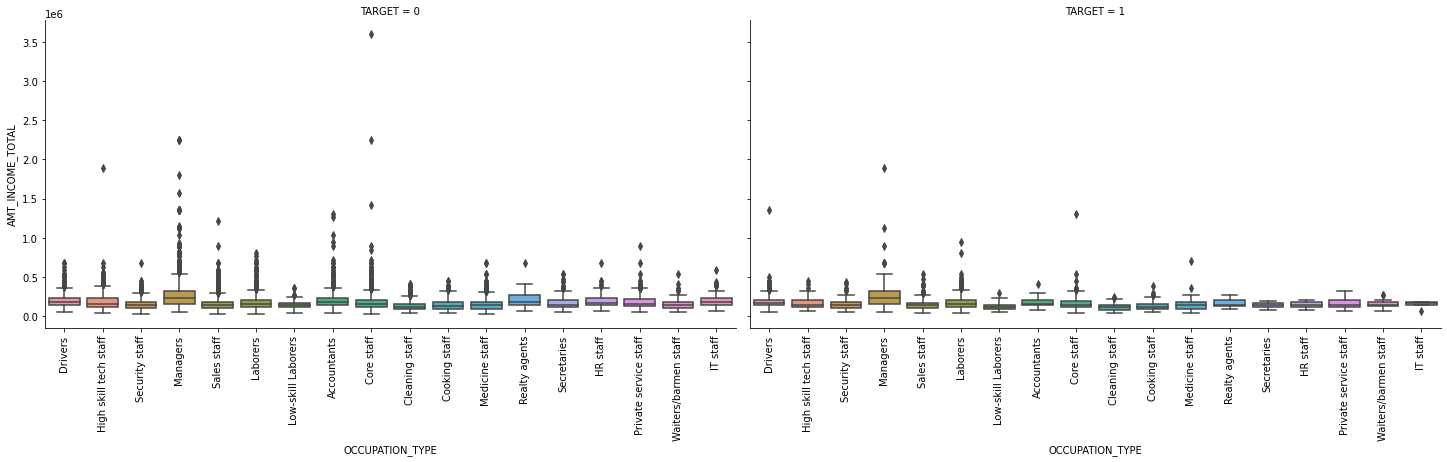

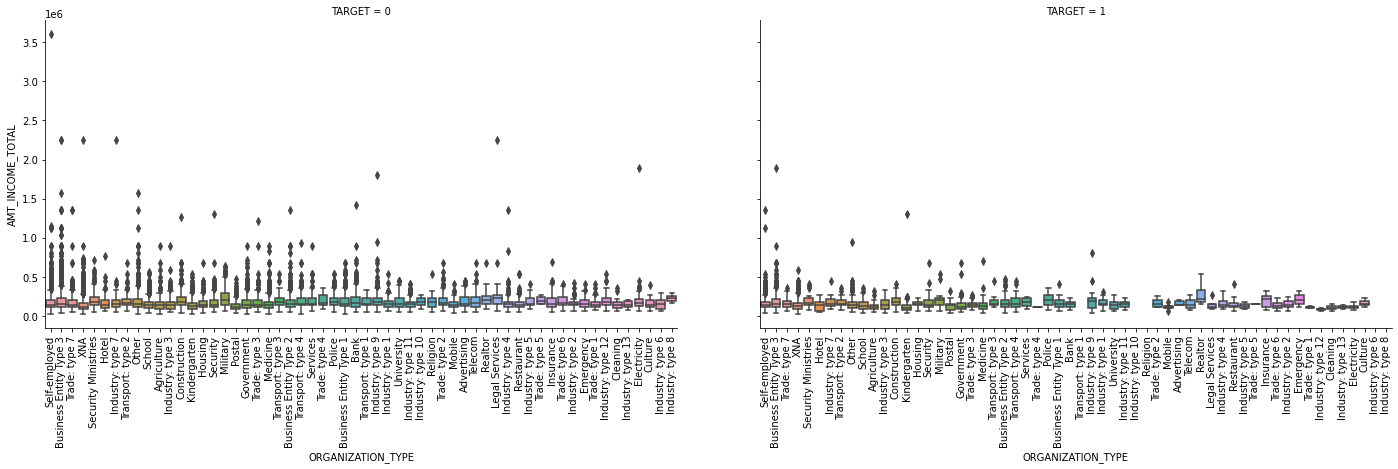

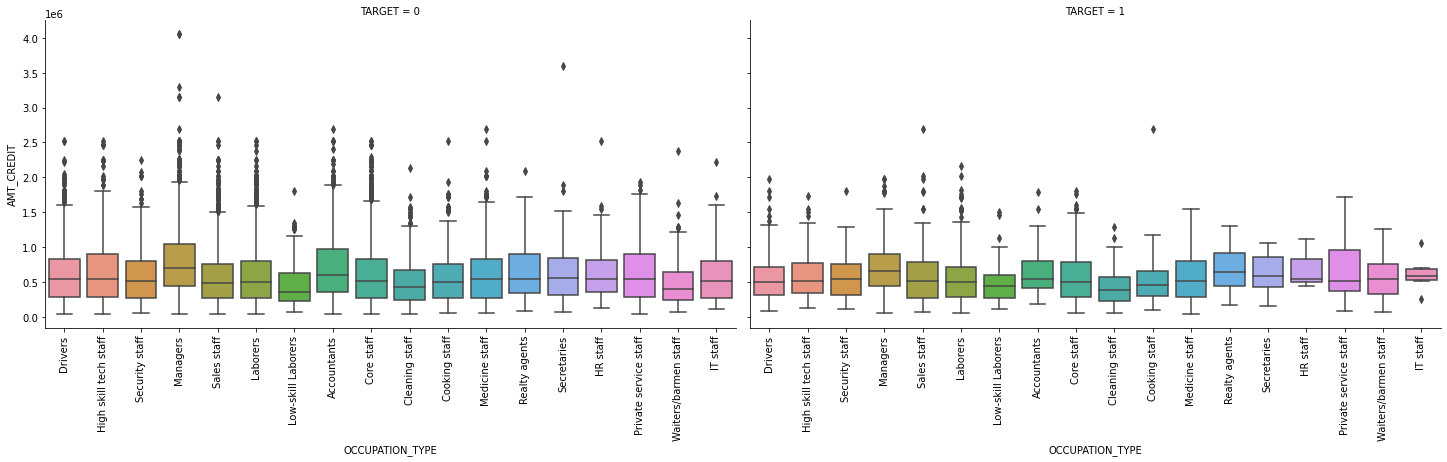

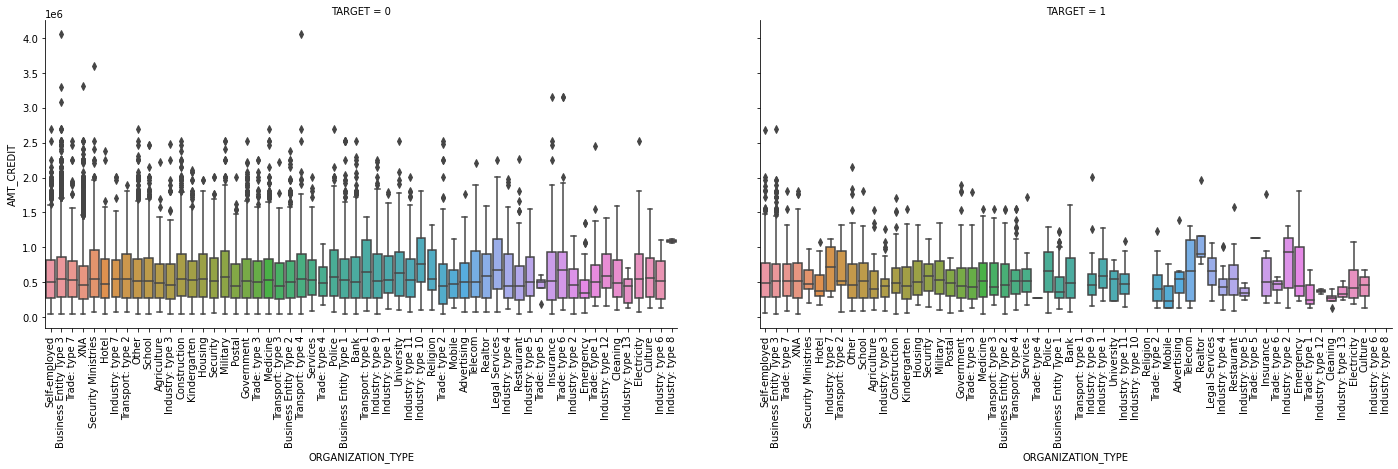

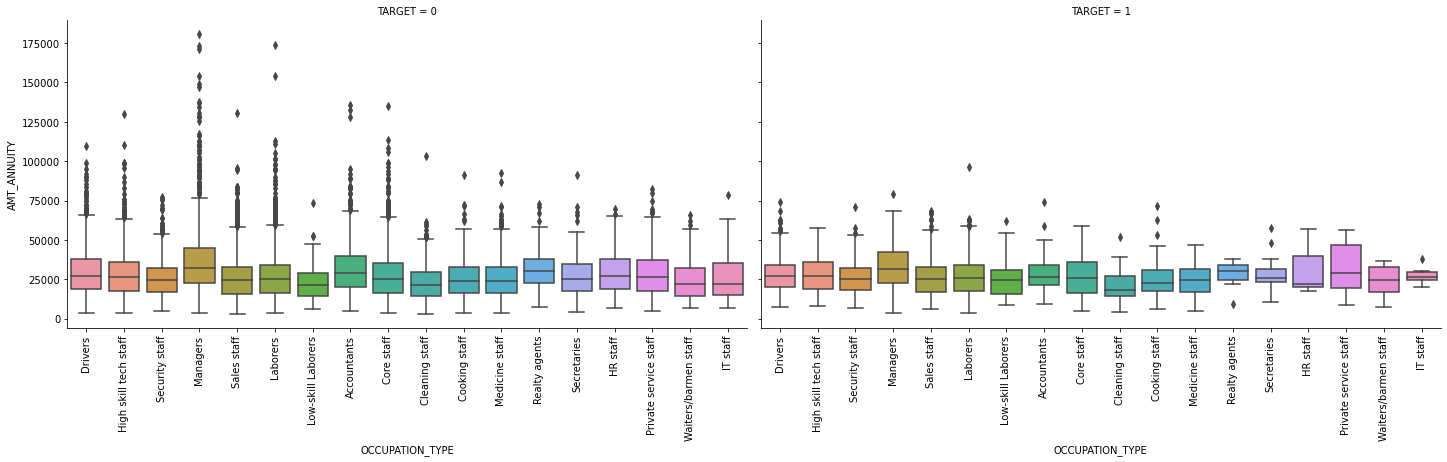

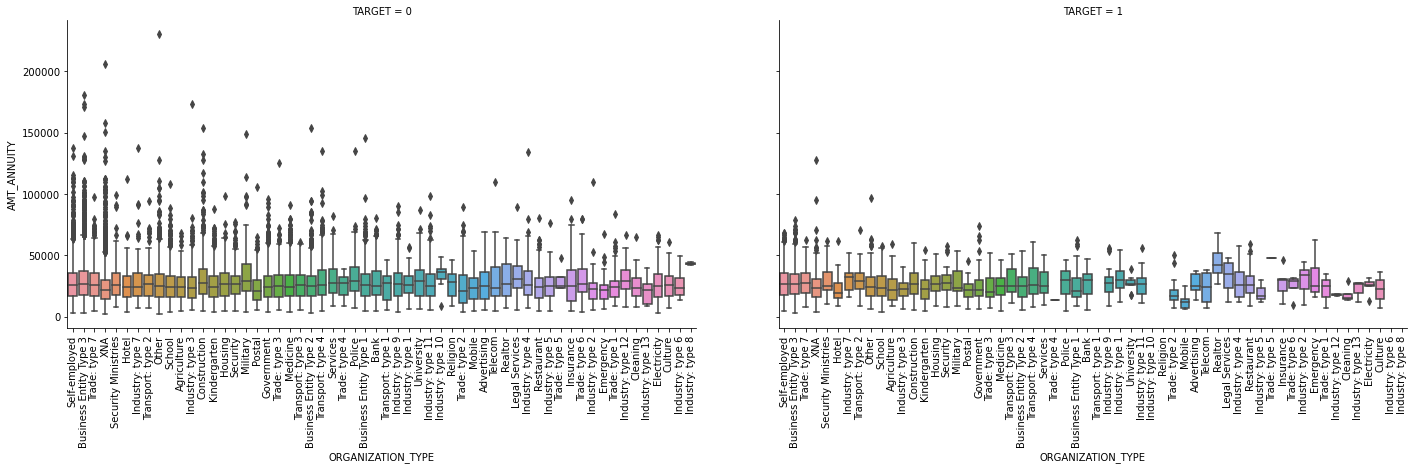

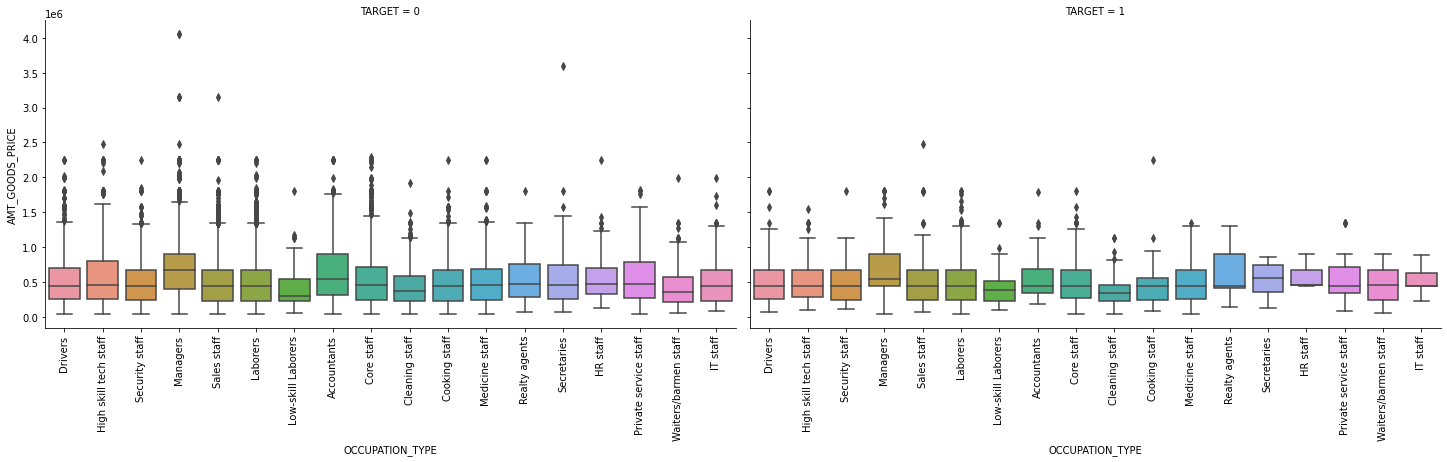

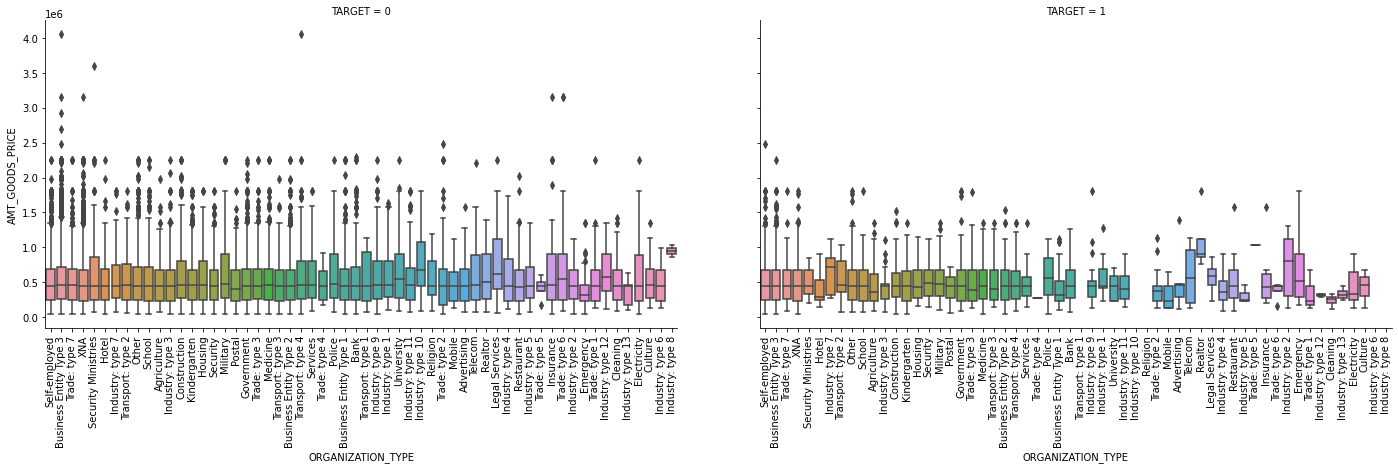

In [76]:
# Target vs amt_cols vs remaining_cols2
for num in amt_cols:
    for cat in remaining_cols2:
        sns.catplot(data=df,x=cat,y=num,col='TARGET',kind='box',aspect=2,height=5).set_xticklabels(rotation=90)
        plt.show()

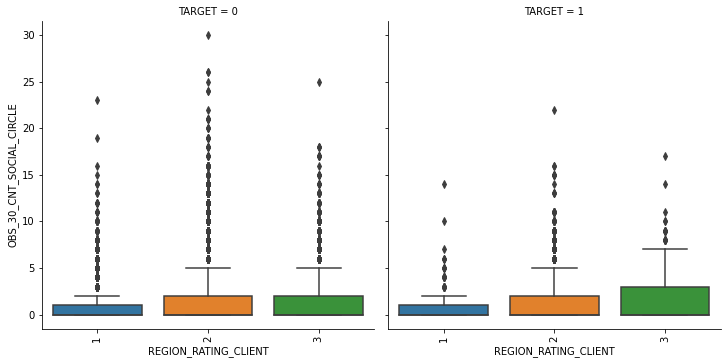

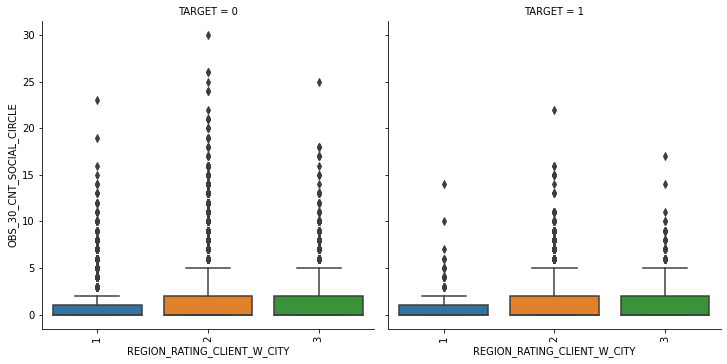

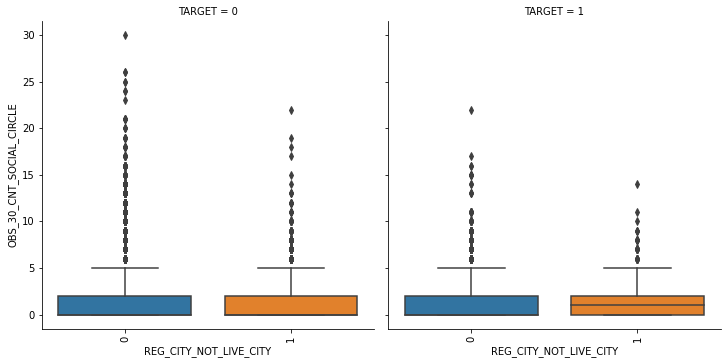

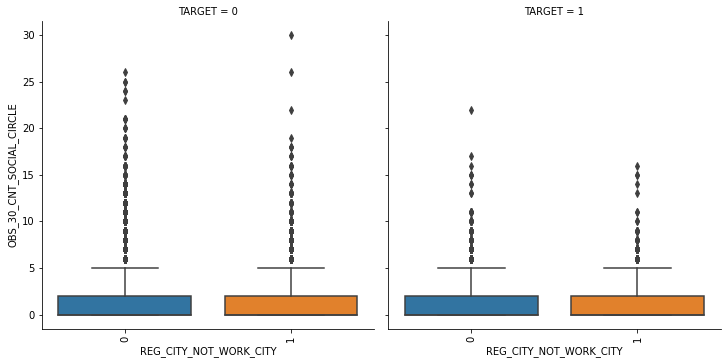

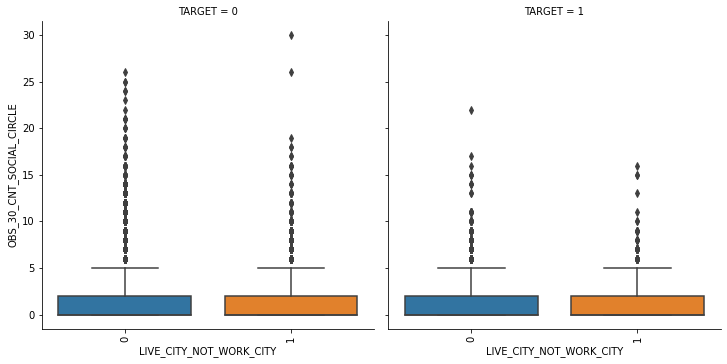

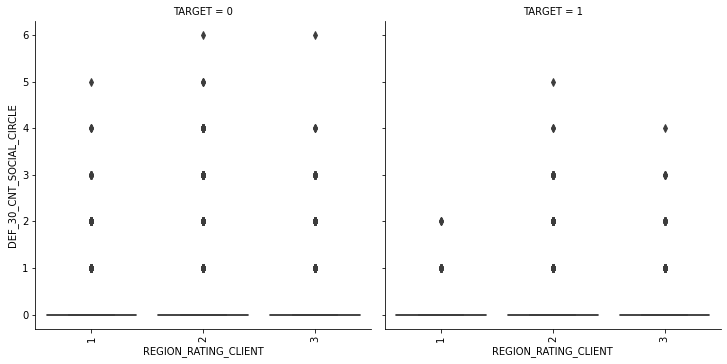

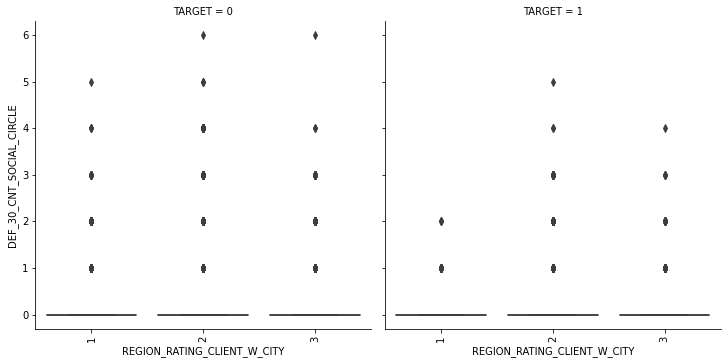

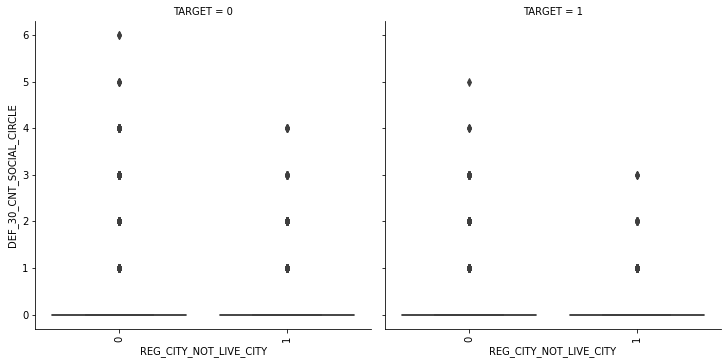

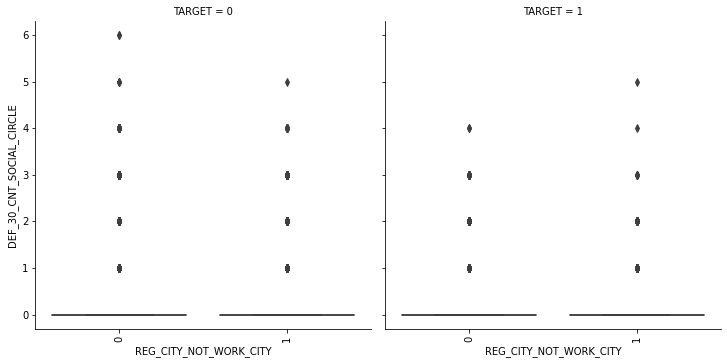

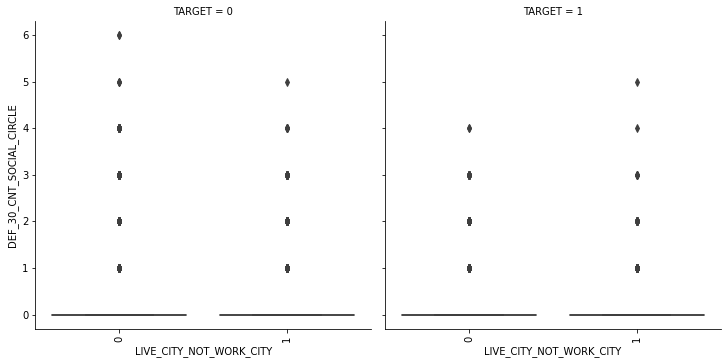

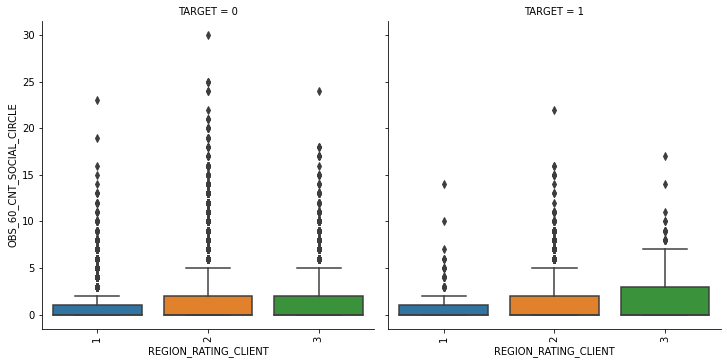

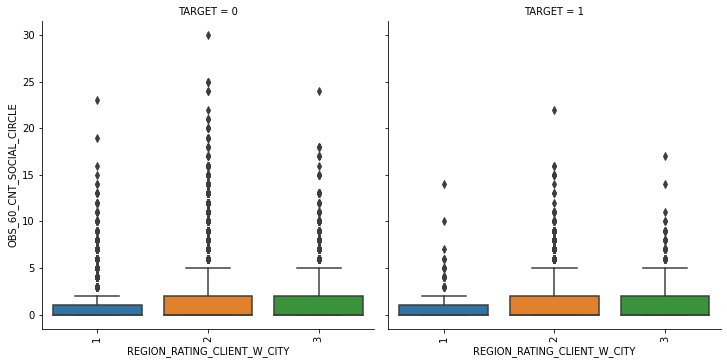

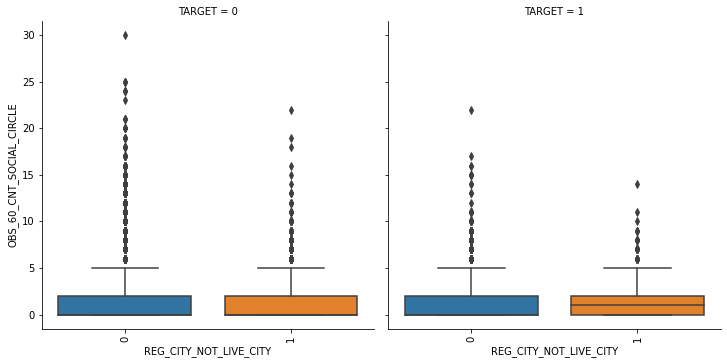

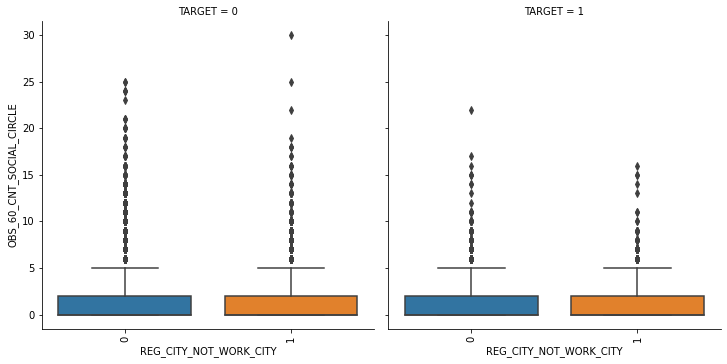

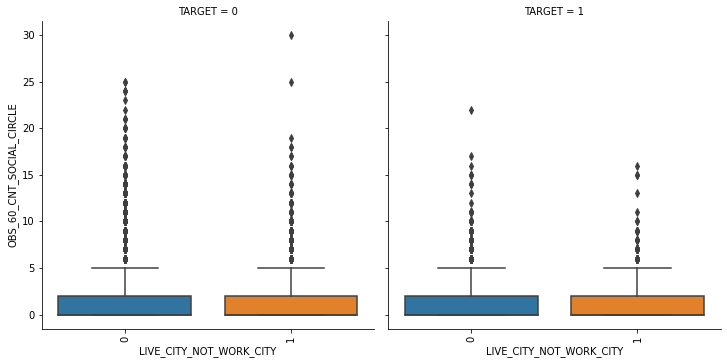

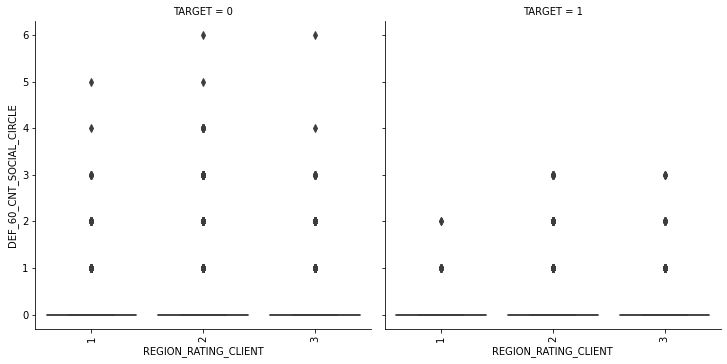

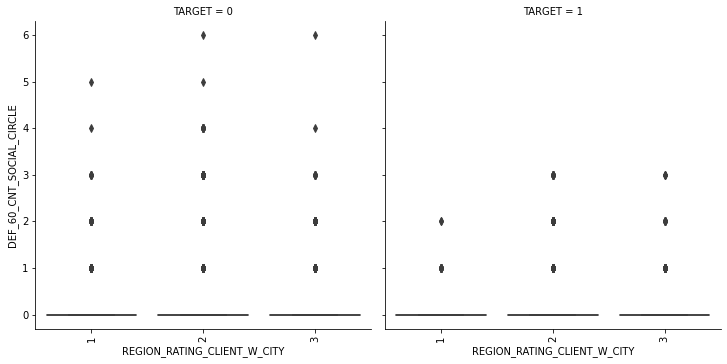

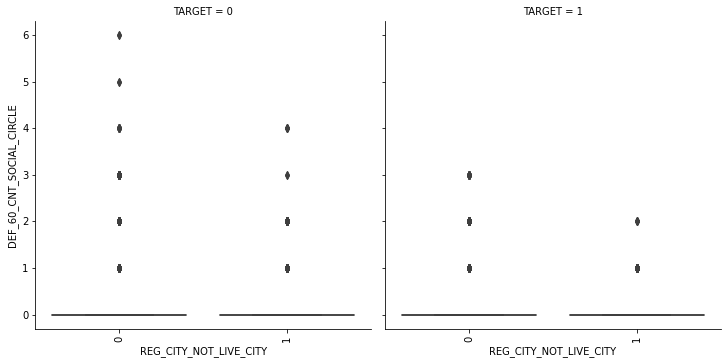

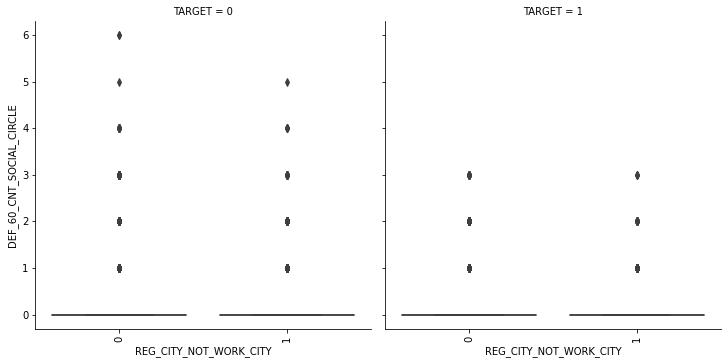

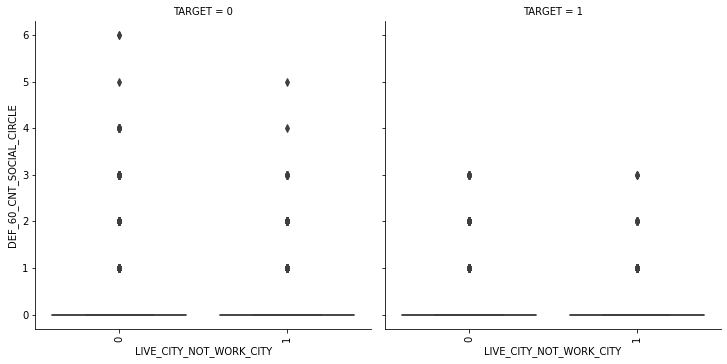

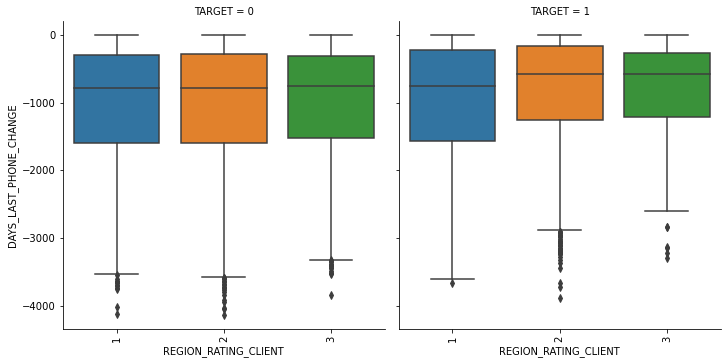

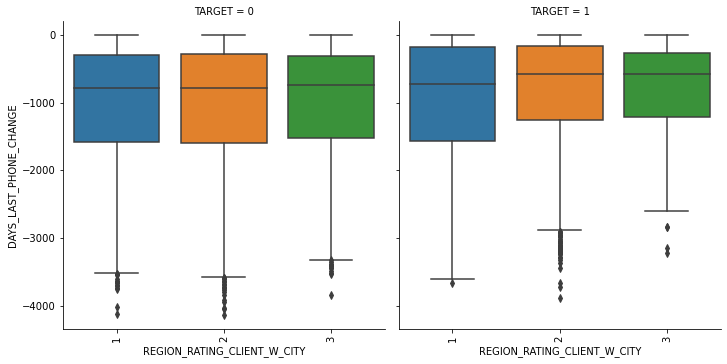

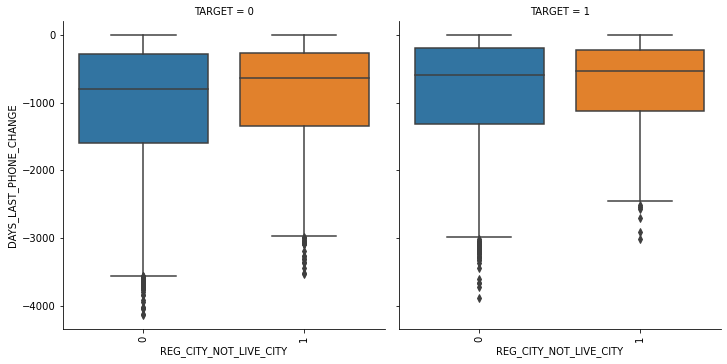

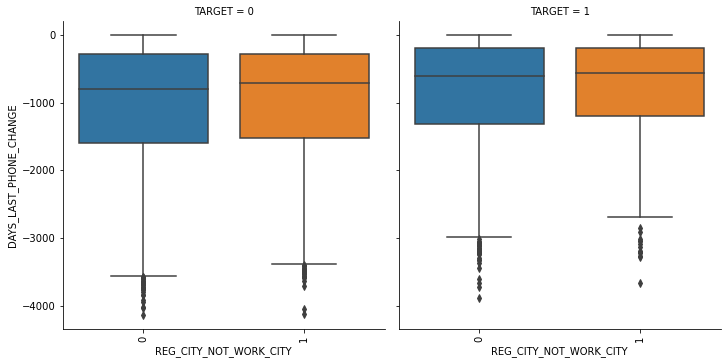

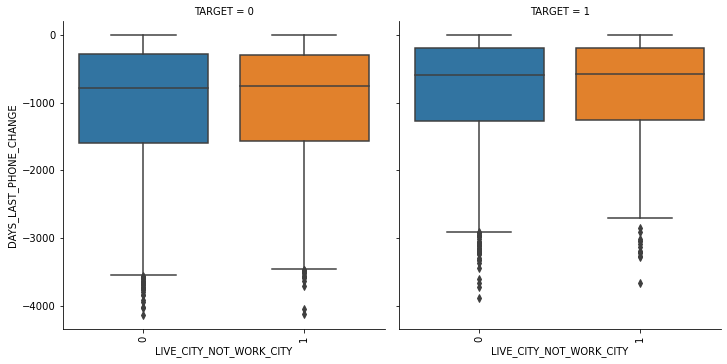

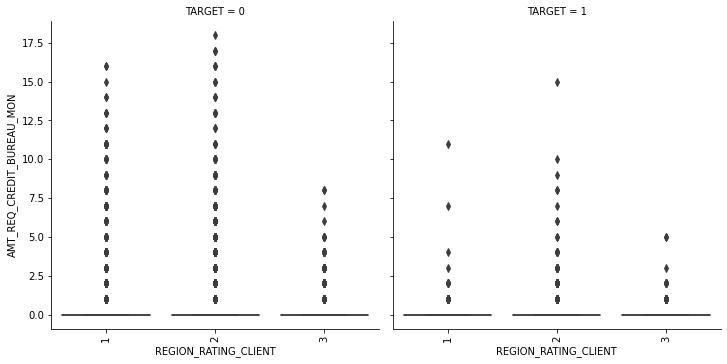

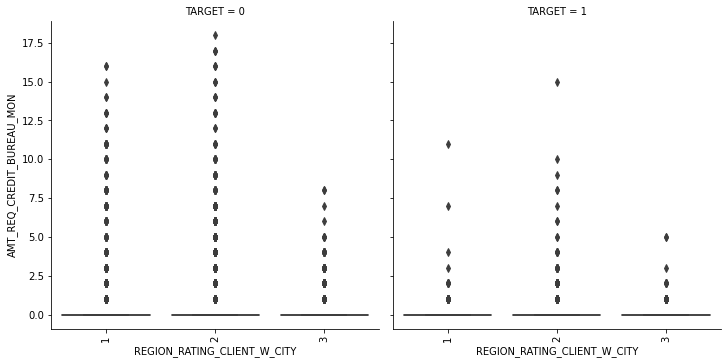

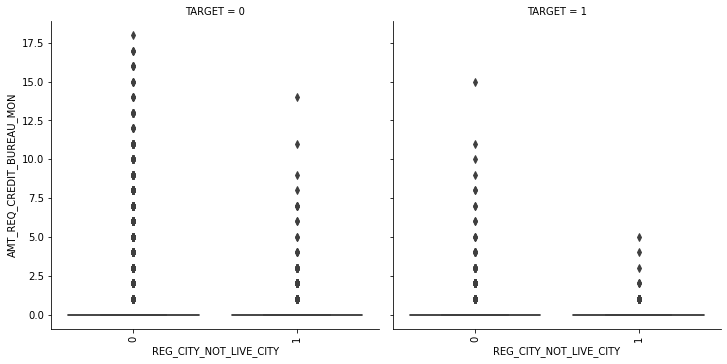

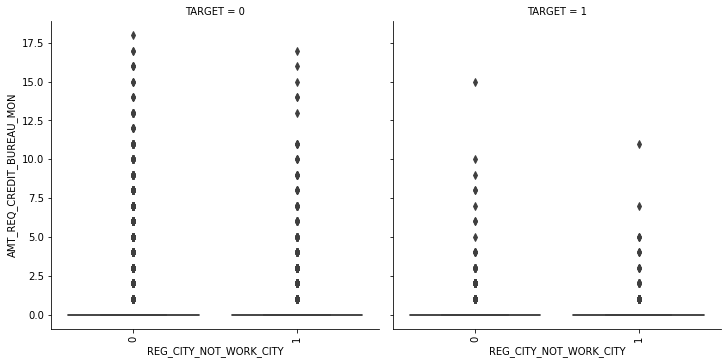

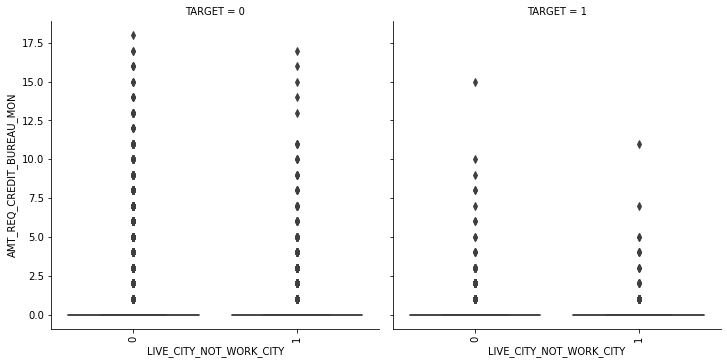

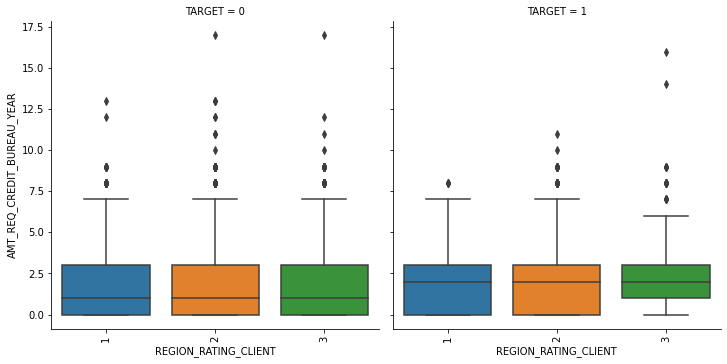

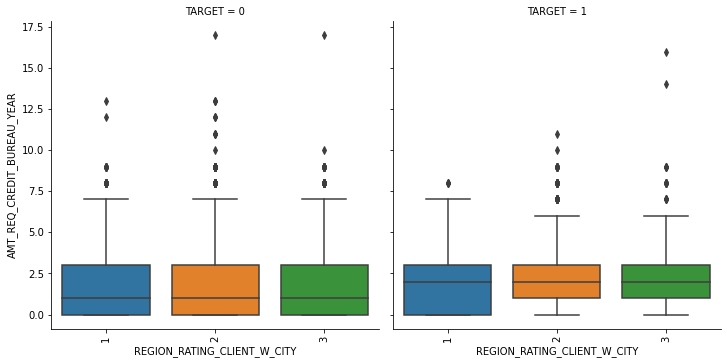

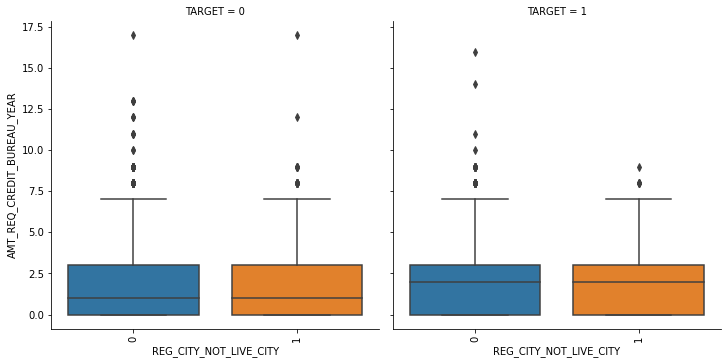

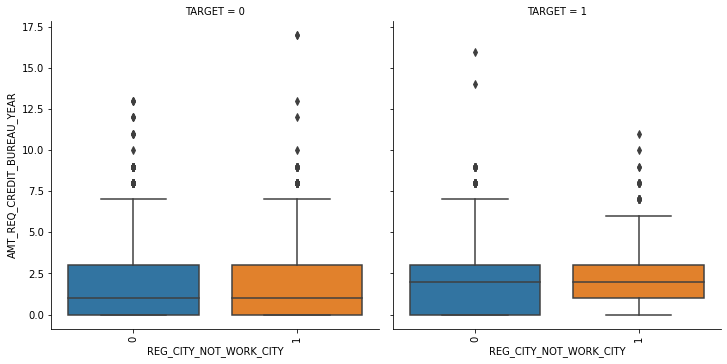

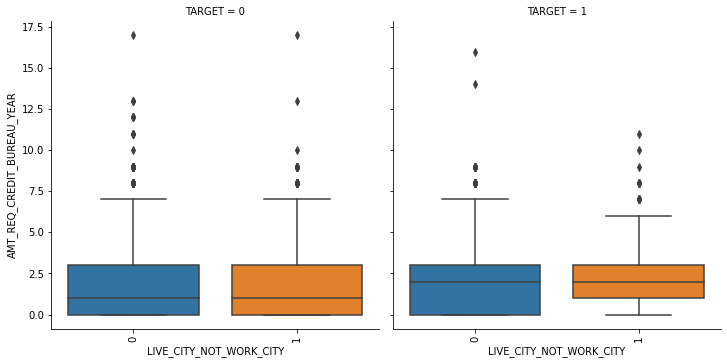

In [77]:
# Target vs social_circle_cols vs region_cols
num_vs_cat_vs_target_plot(social_circle_cols,cat_region_cols)

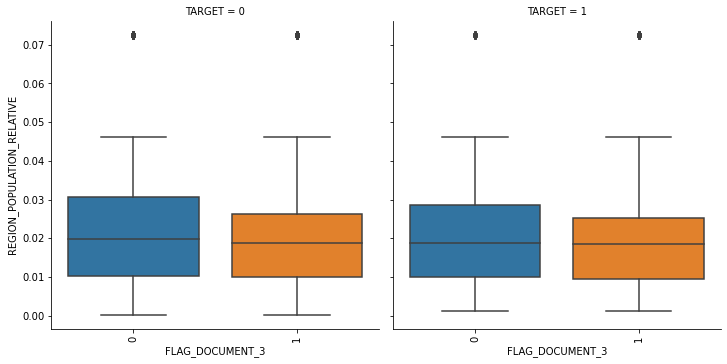

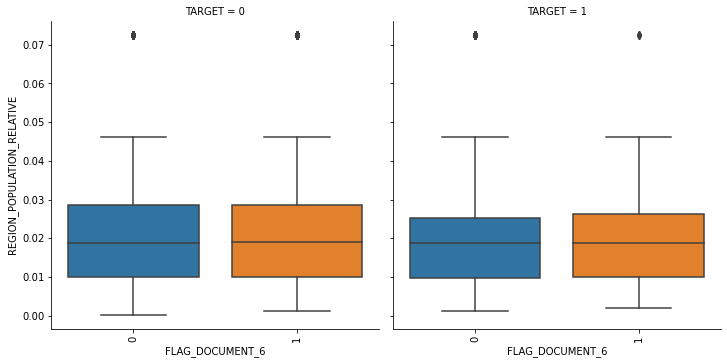

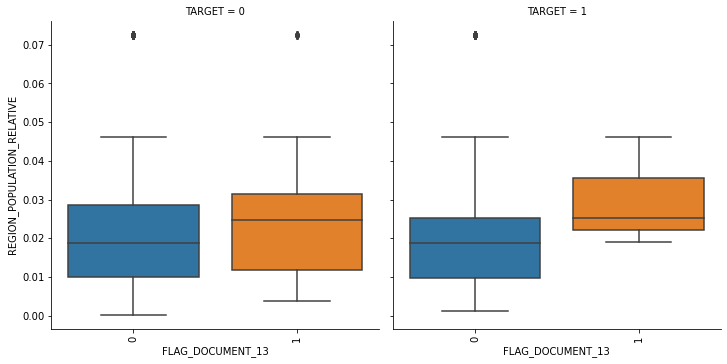

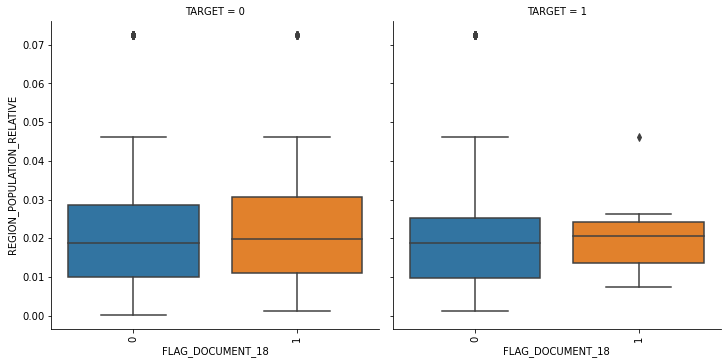

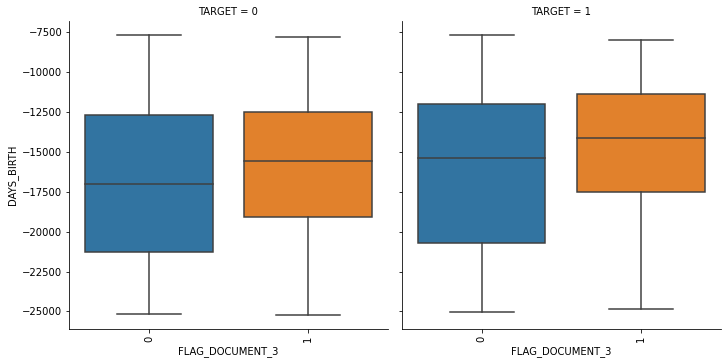

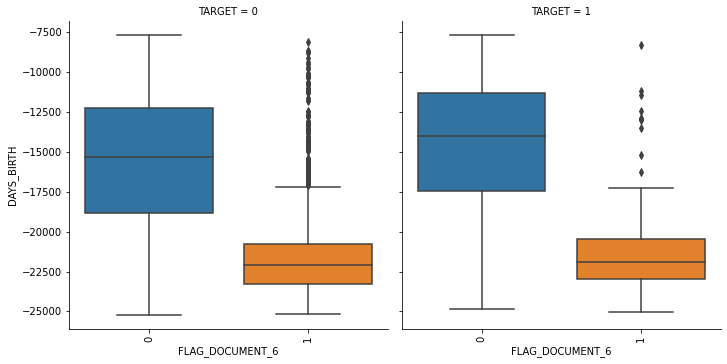

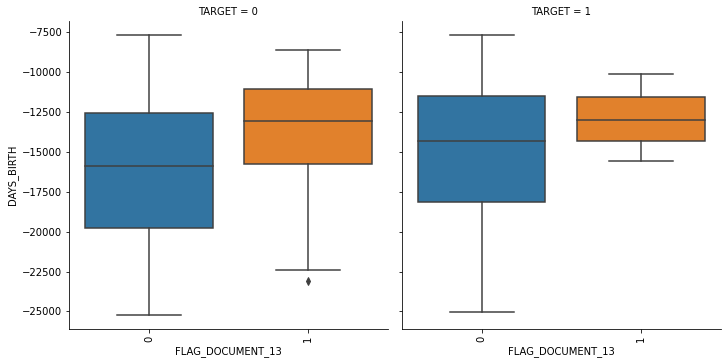

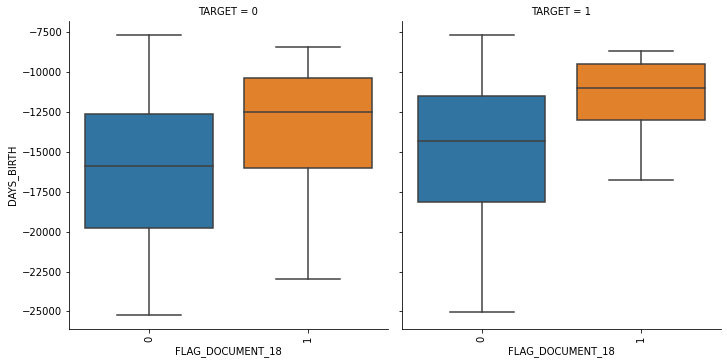

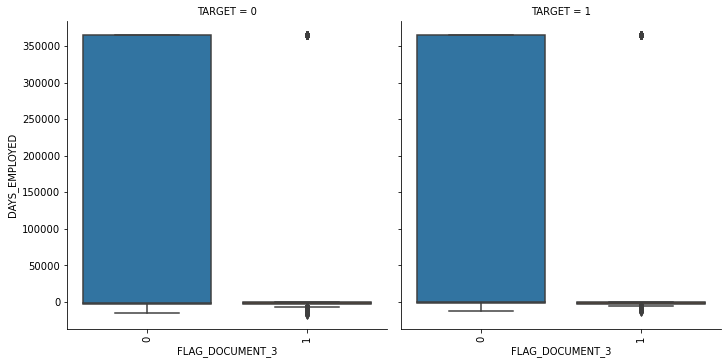

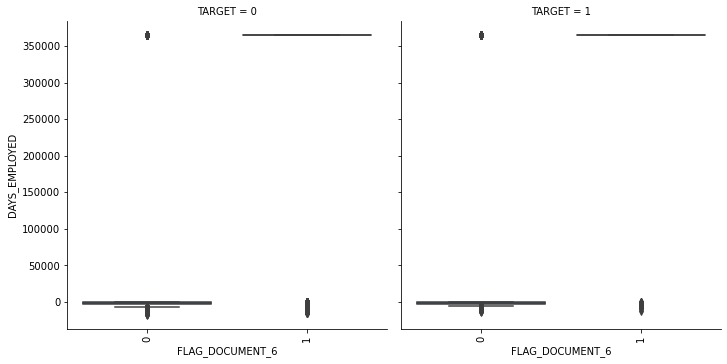

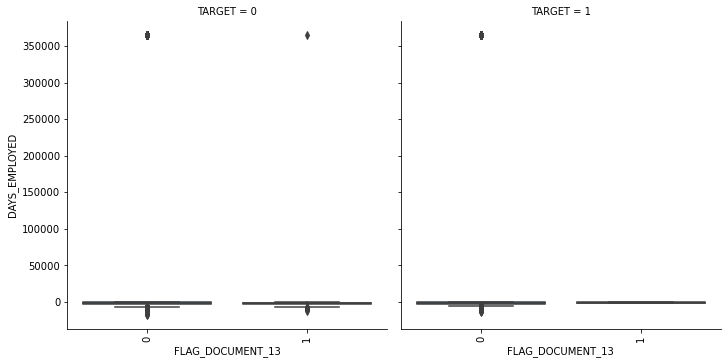

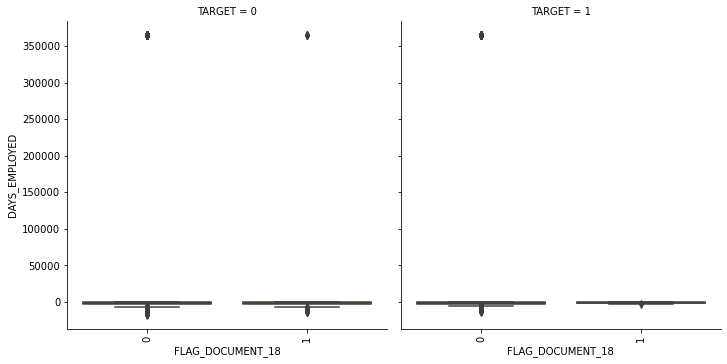

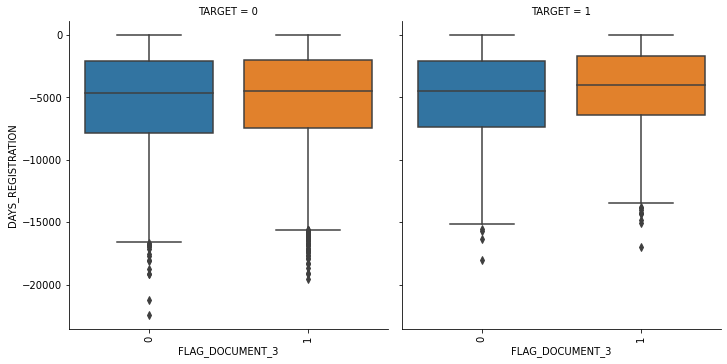

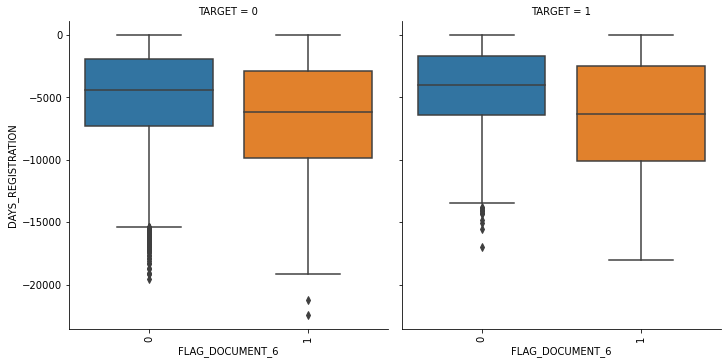

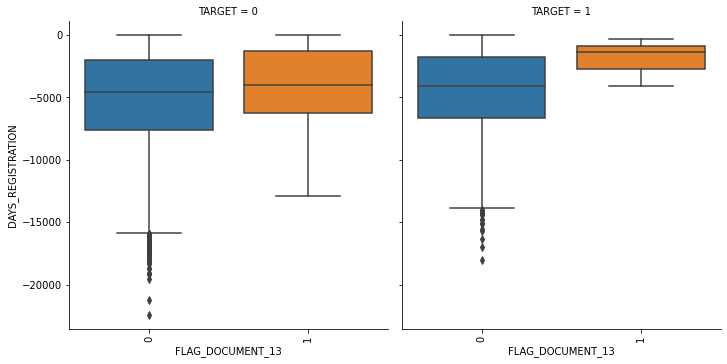

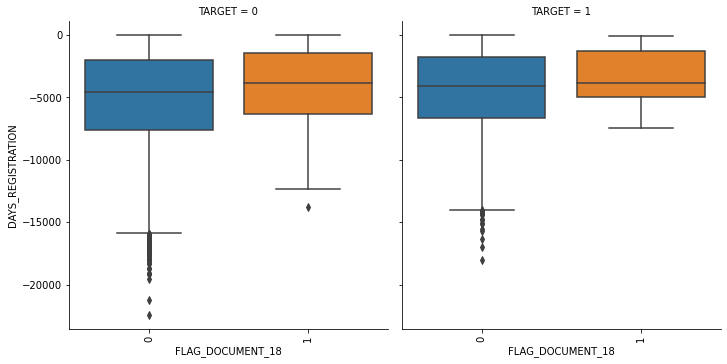

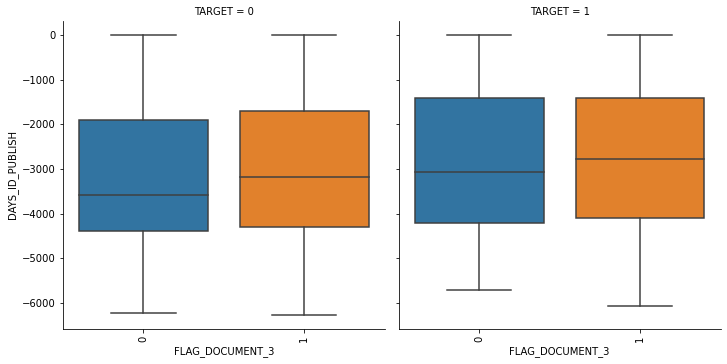

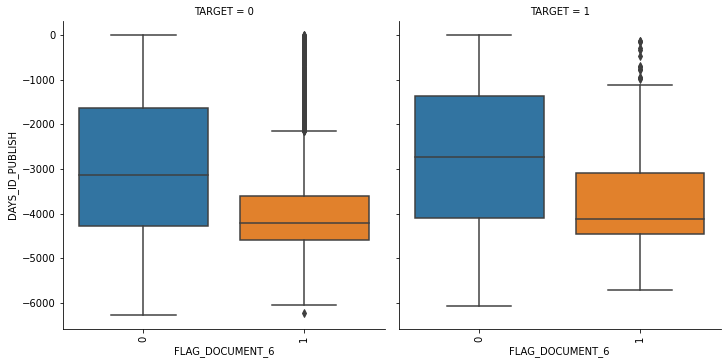

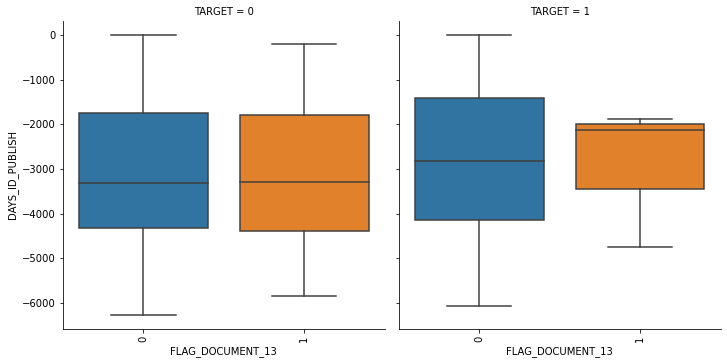

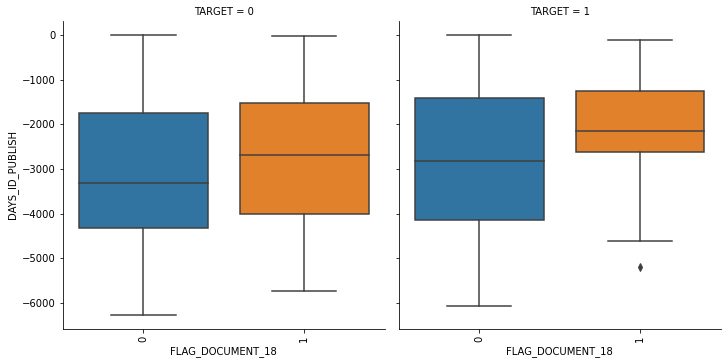

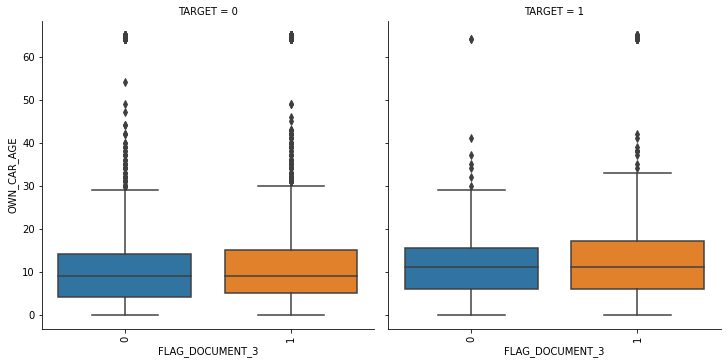

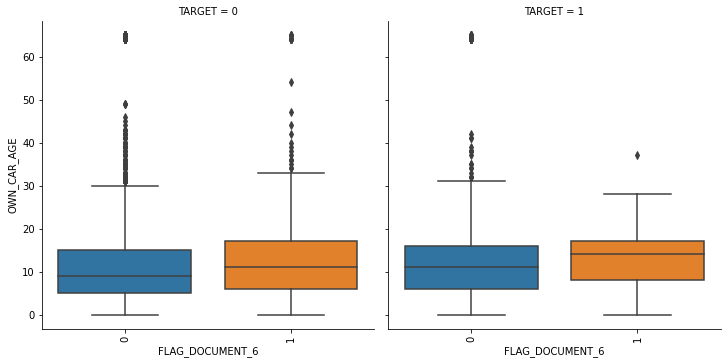

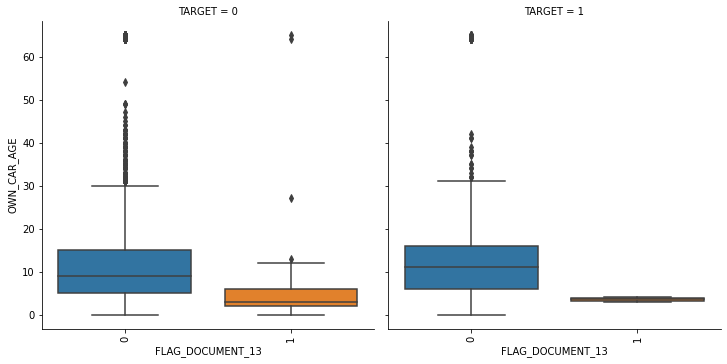

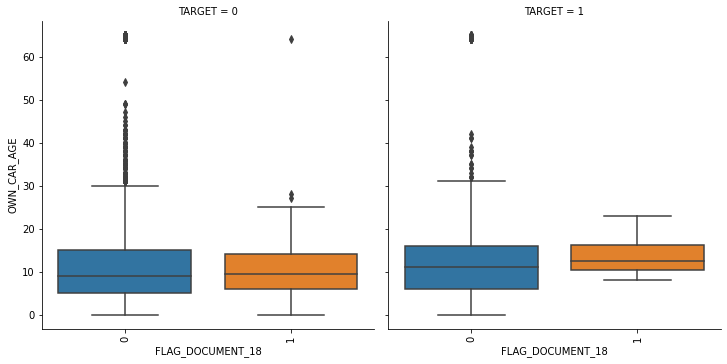

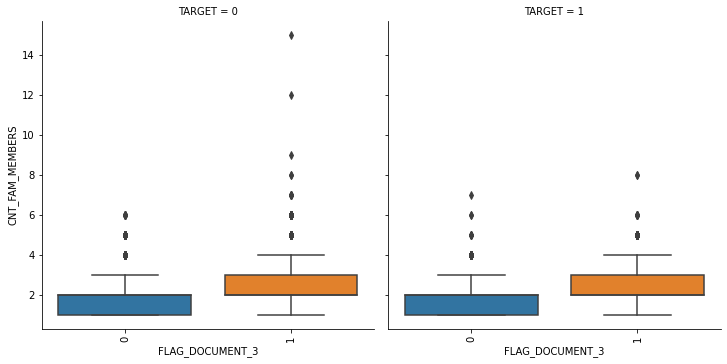

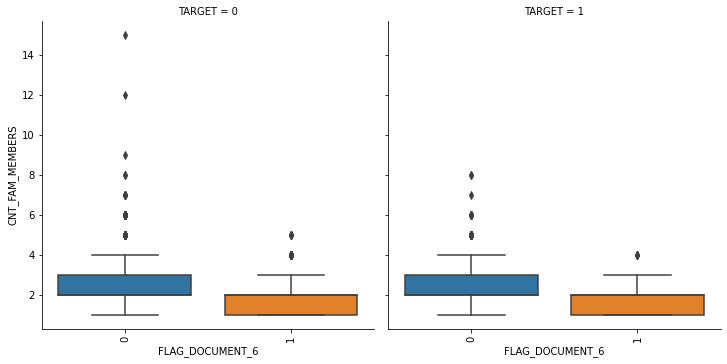

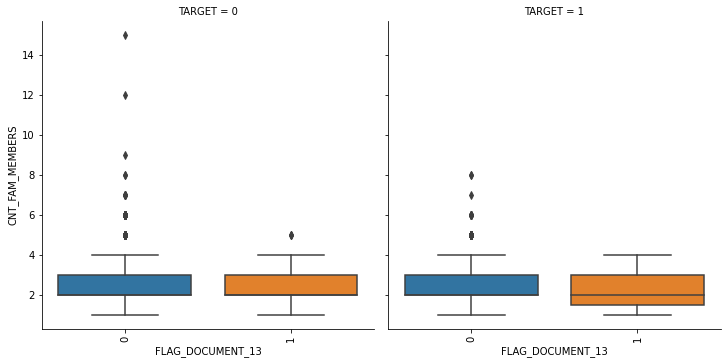

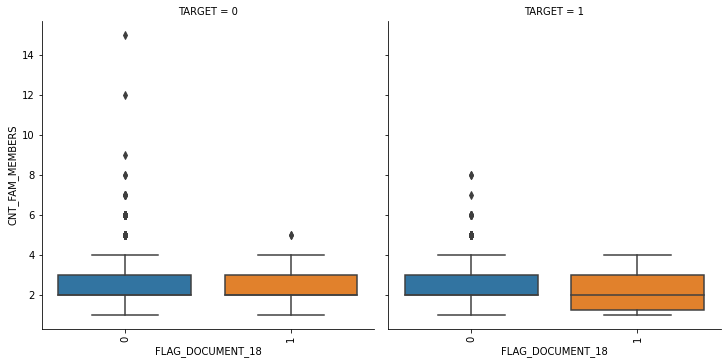

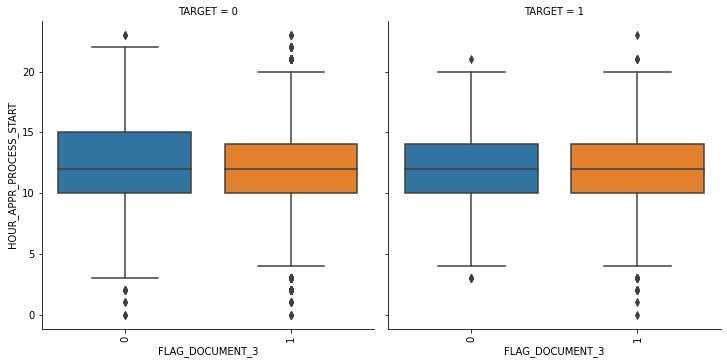

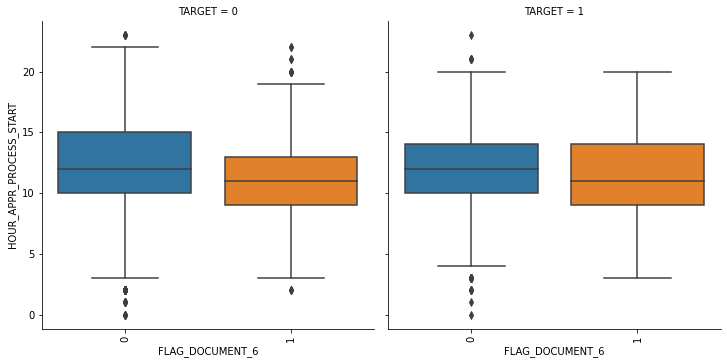

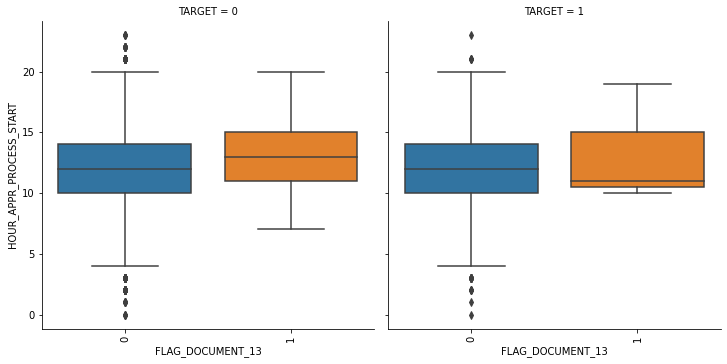

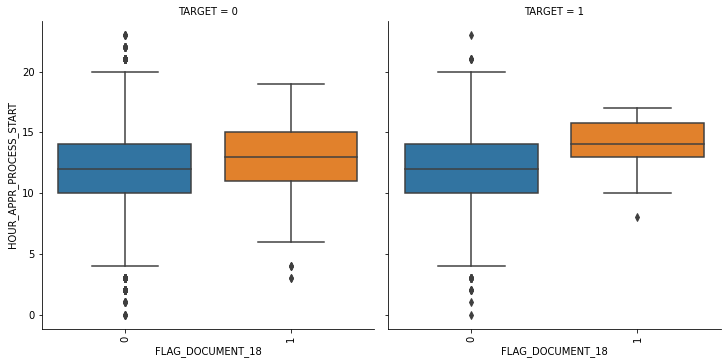

In [80]:
# Target vs num_region_cols vs document_cols
num_vs_cat_vs_target_plot(num_region_cols,document_cols)

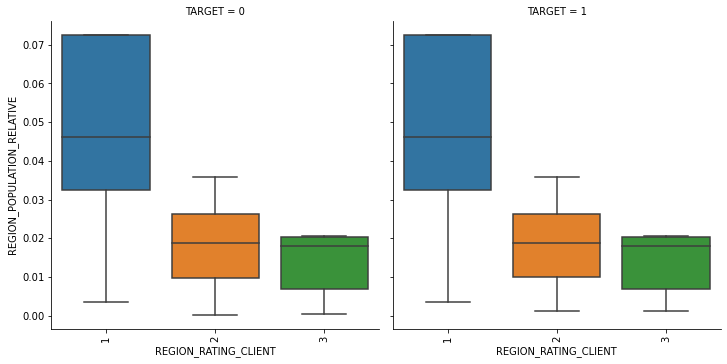

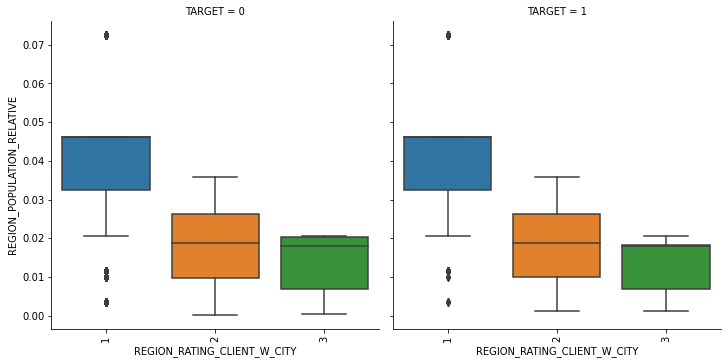

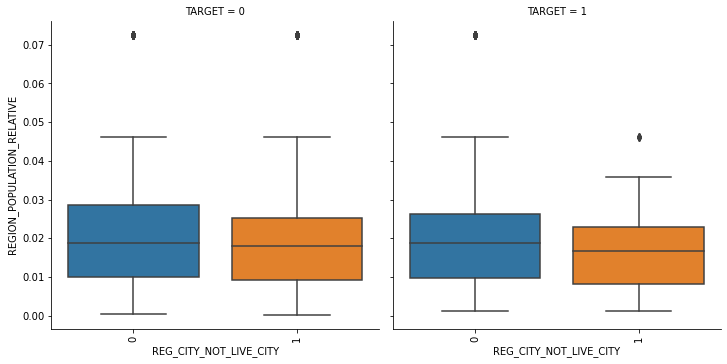

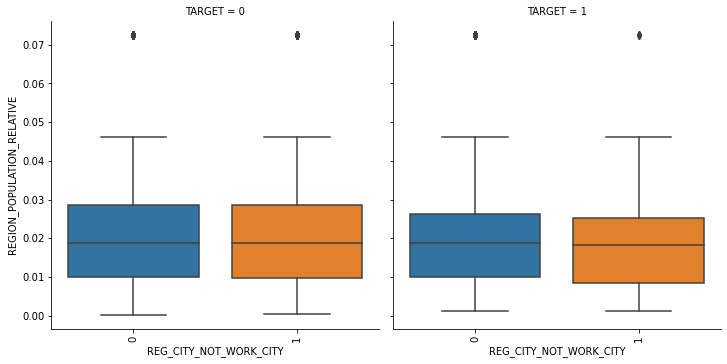

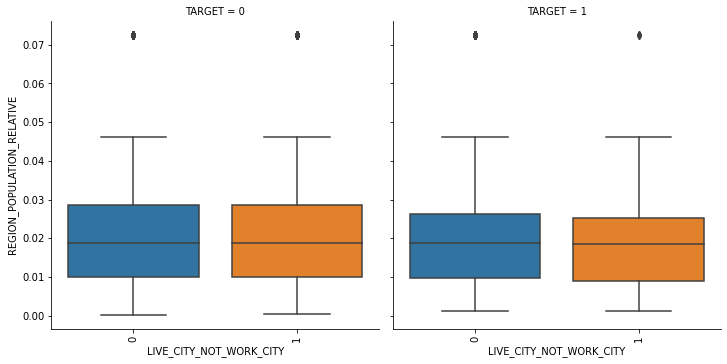

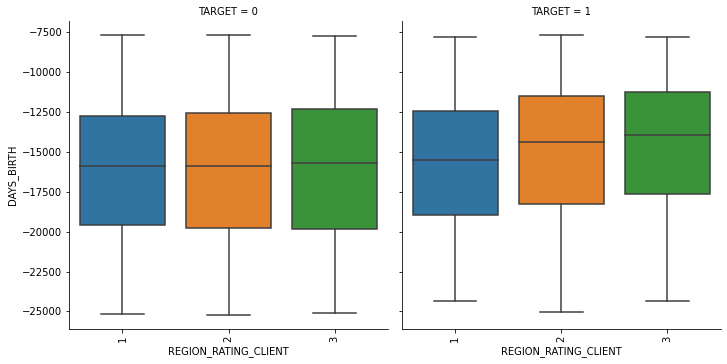

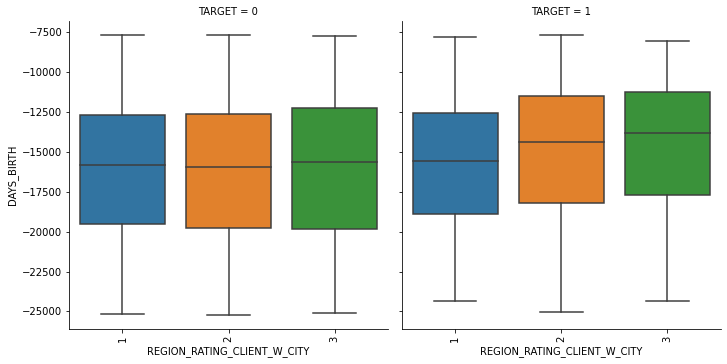

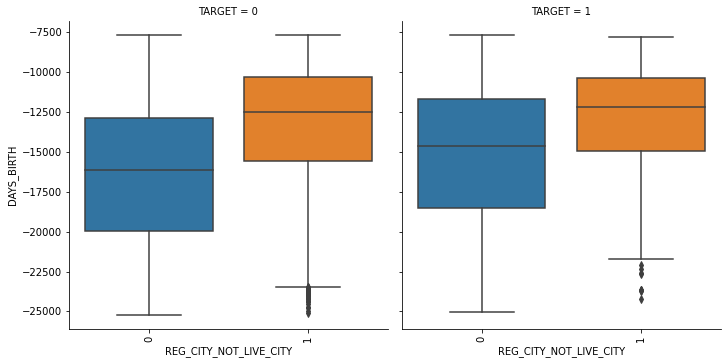

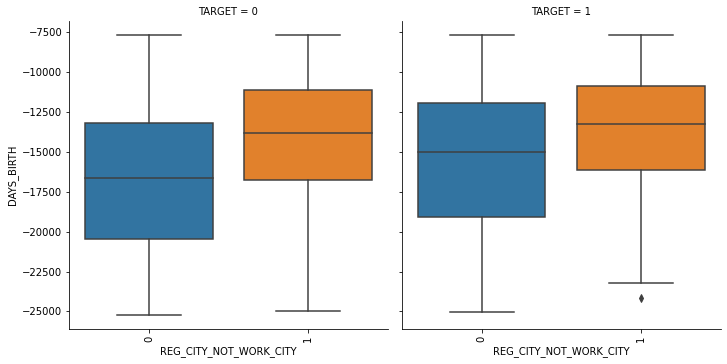

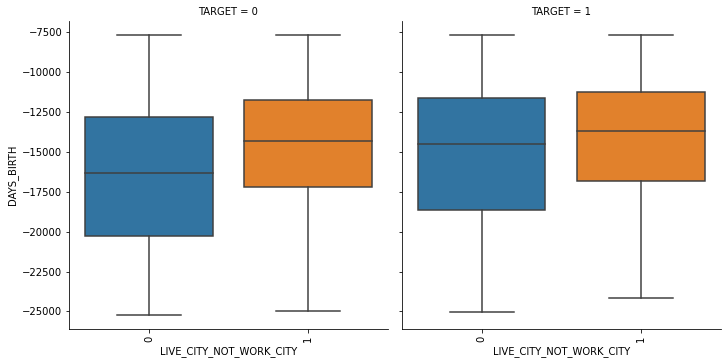

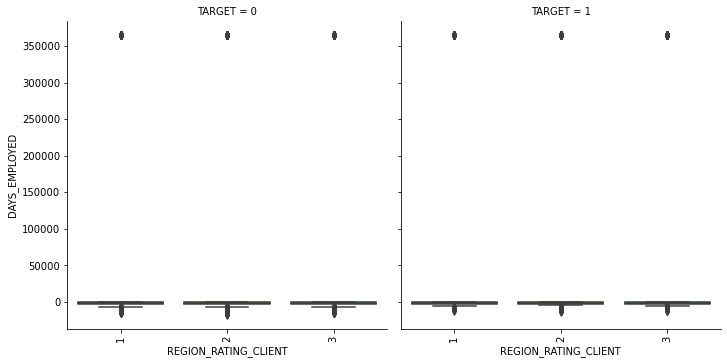

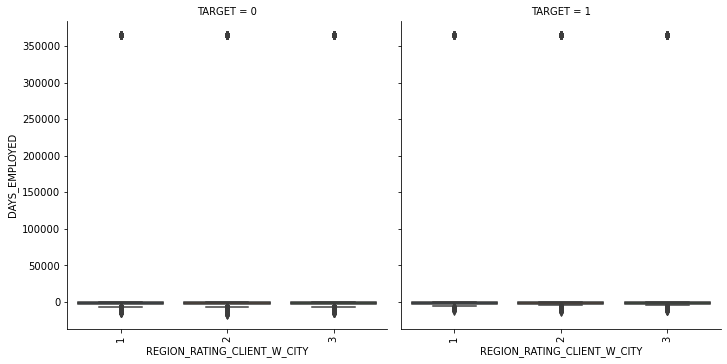

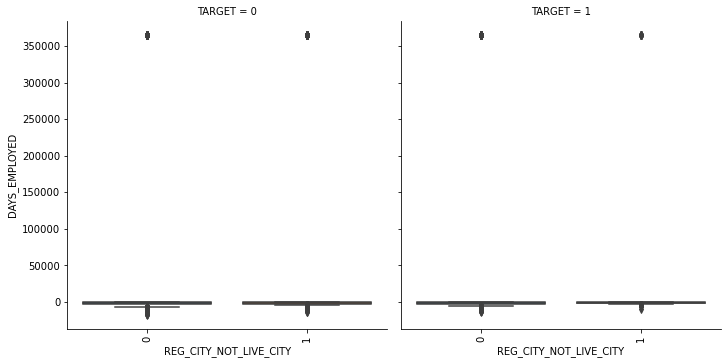

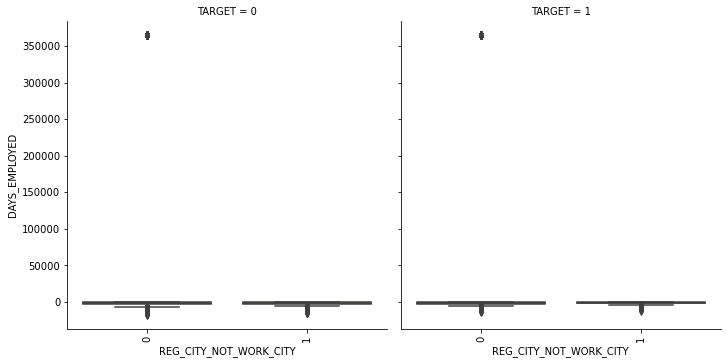

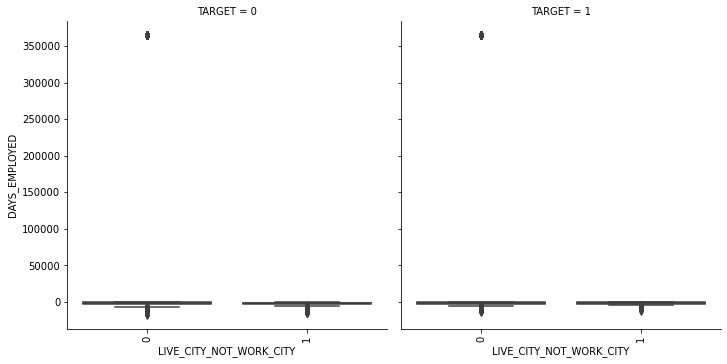

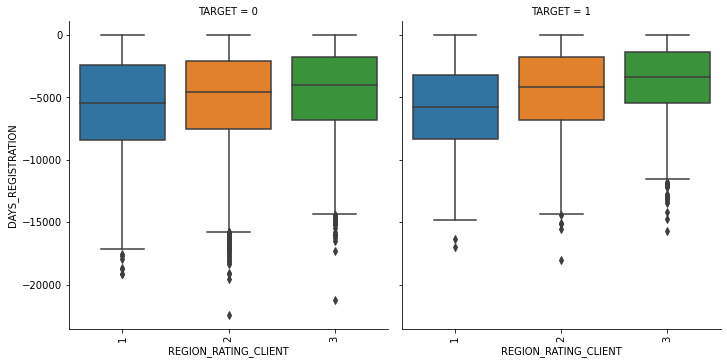

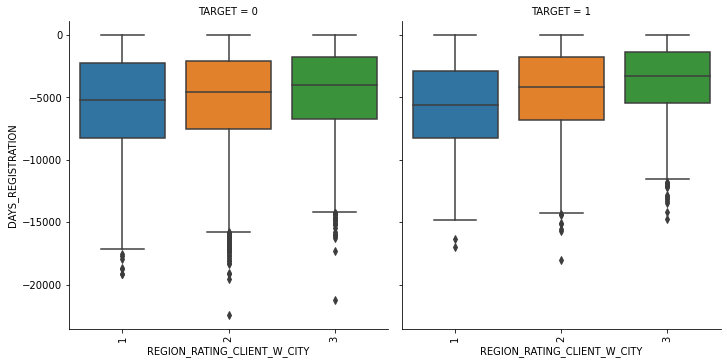

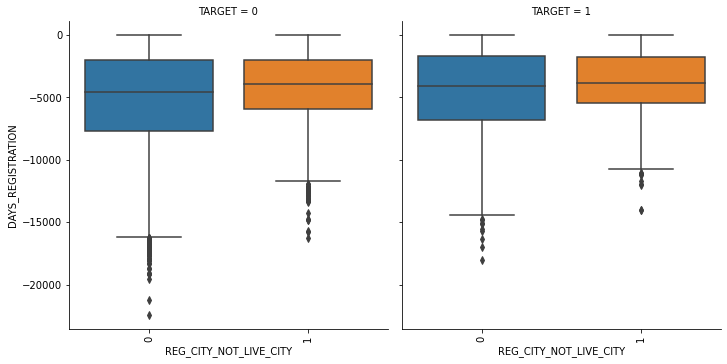

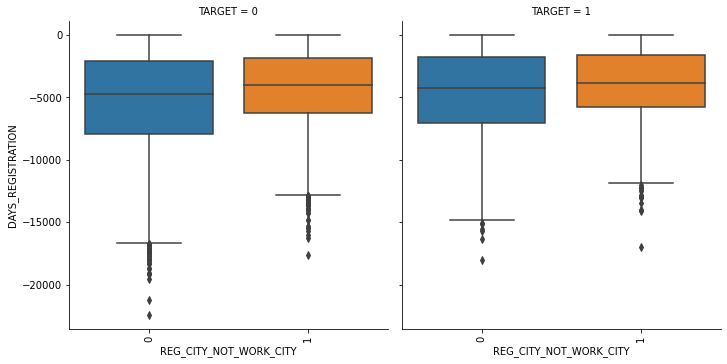

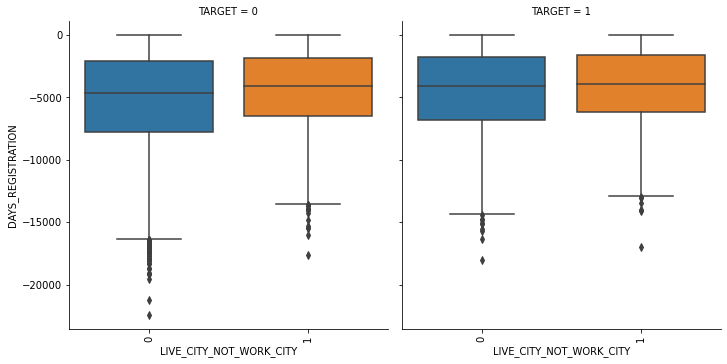

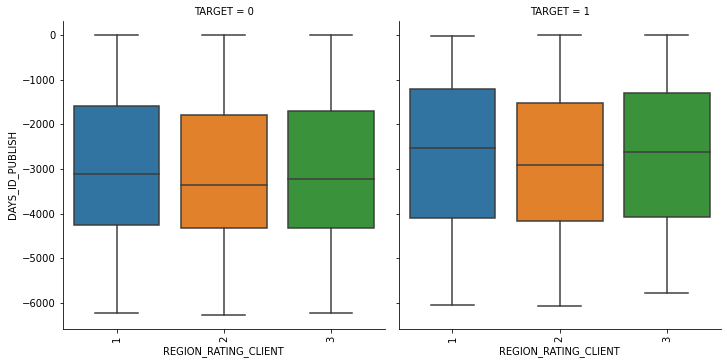

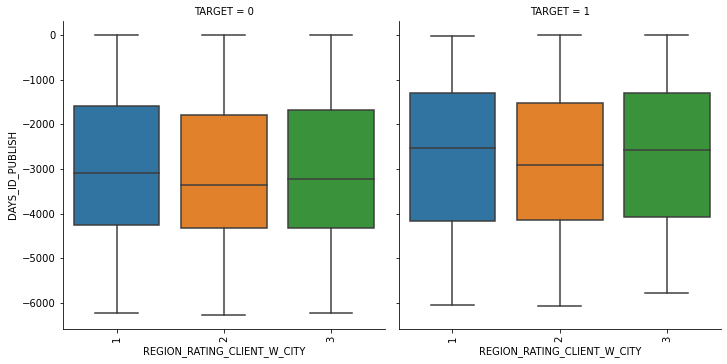

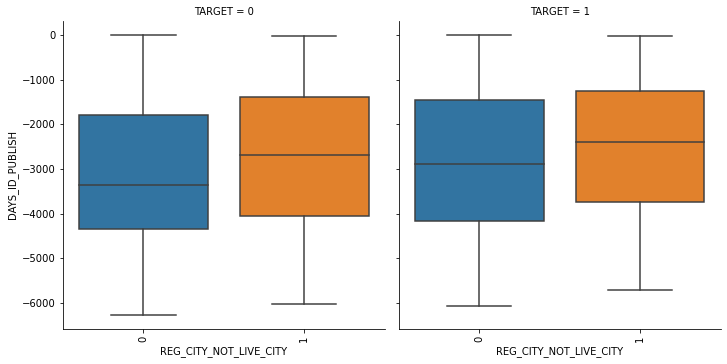

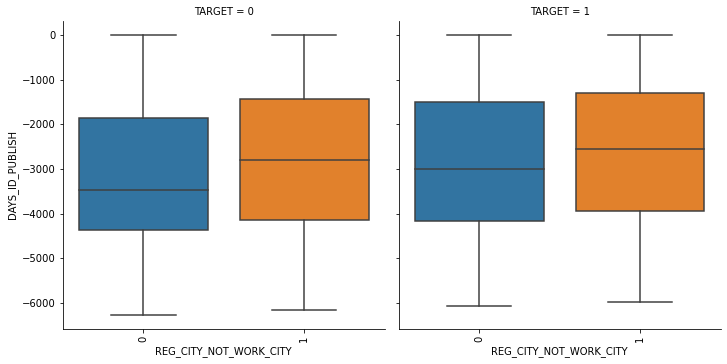

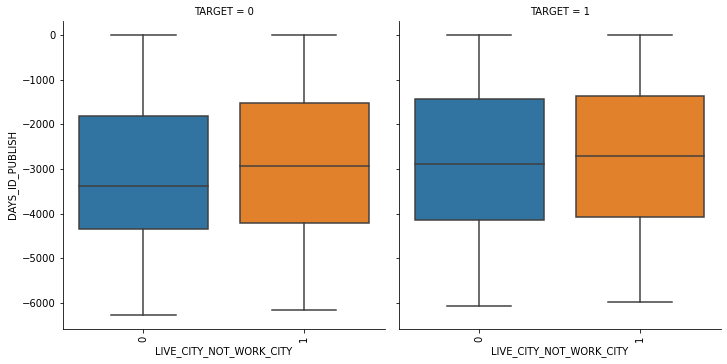

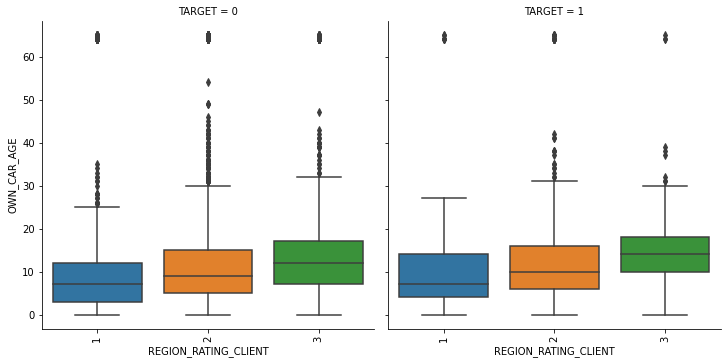

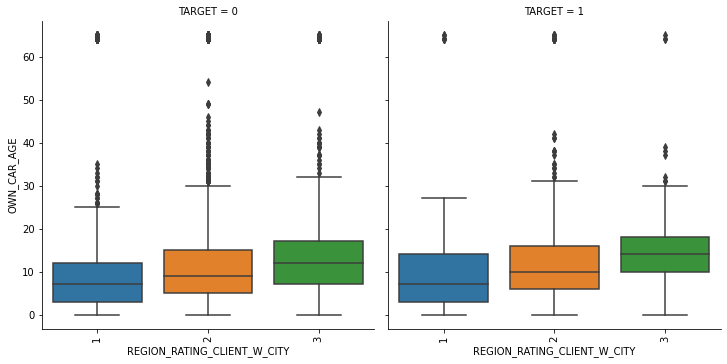

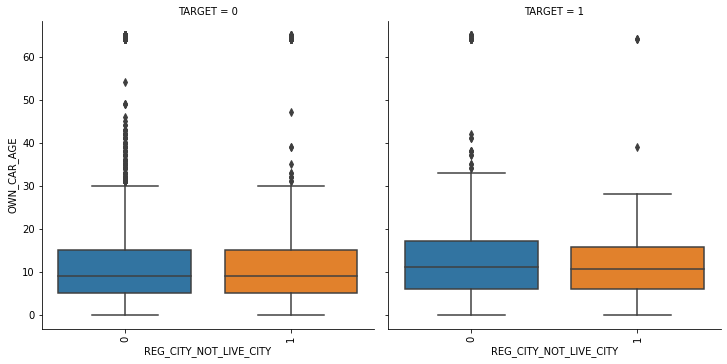

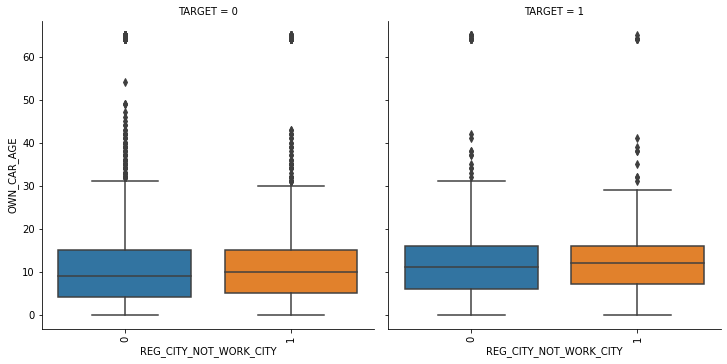

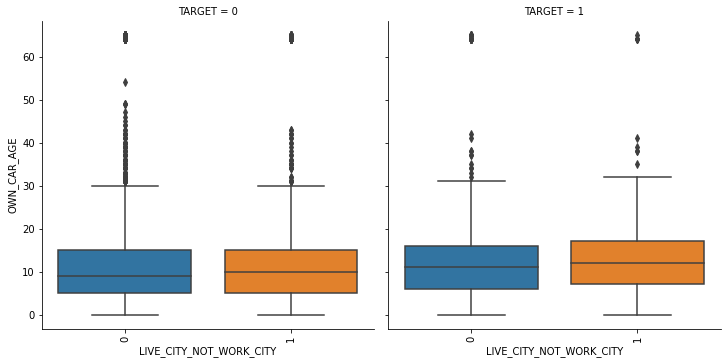

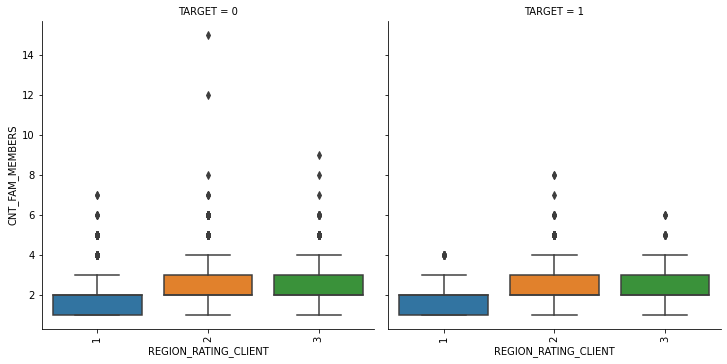

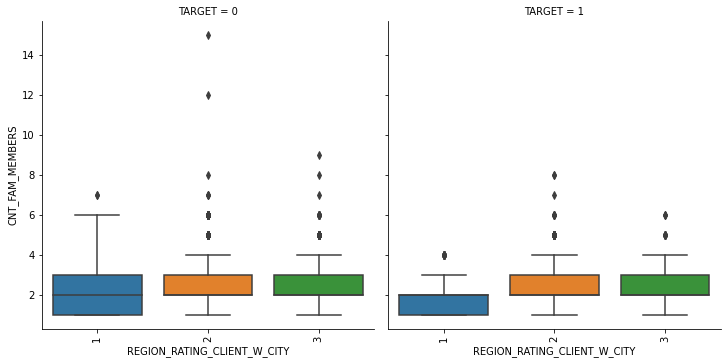

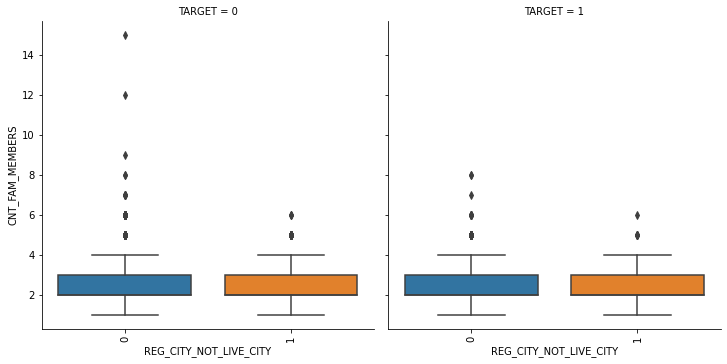

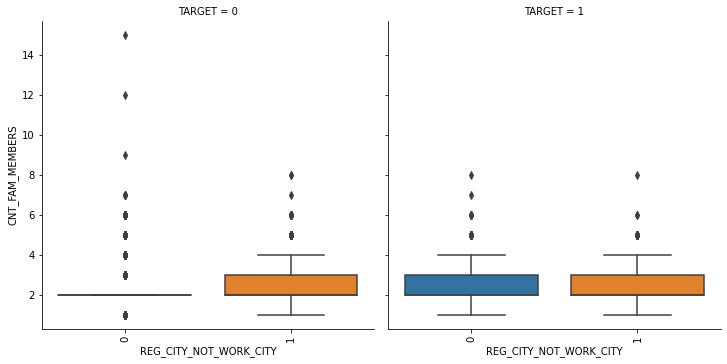

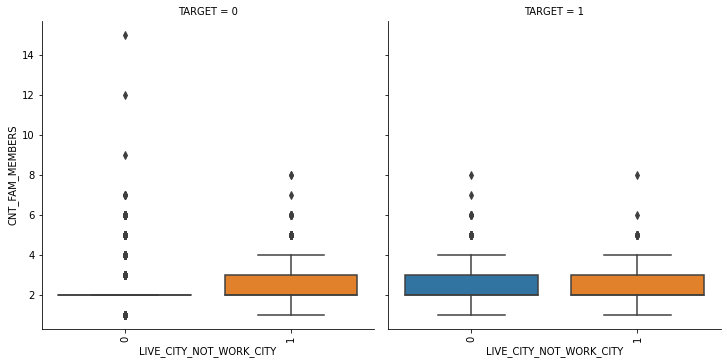

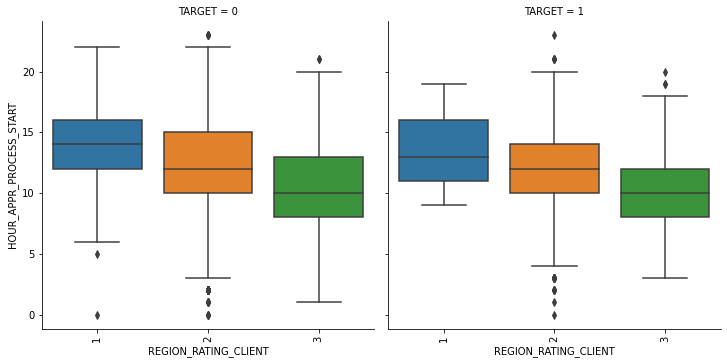

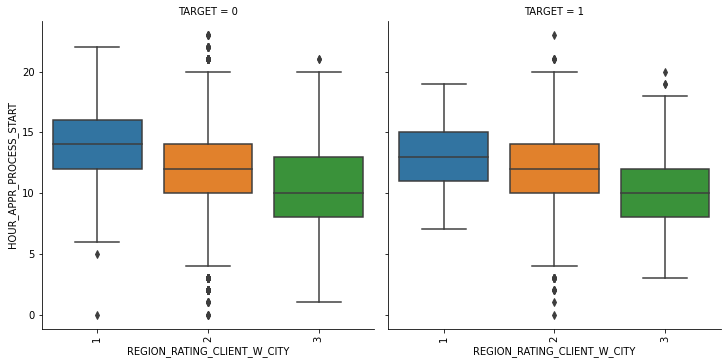

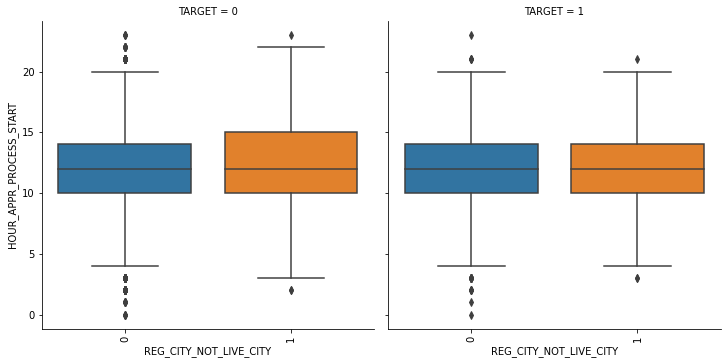

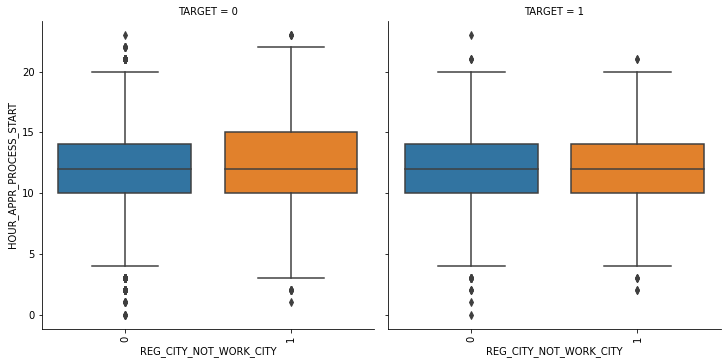

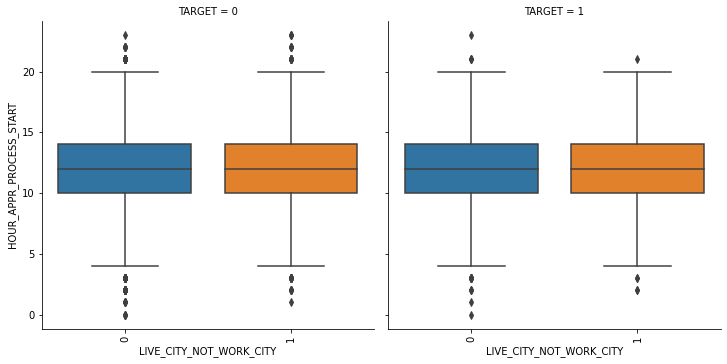

In [81]:
#Target vs num_region_cols vs cat_region_cols
num_vs_cat_vs_target_plot(num_region_cols,cat_region_cols)

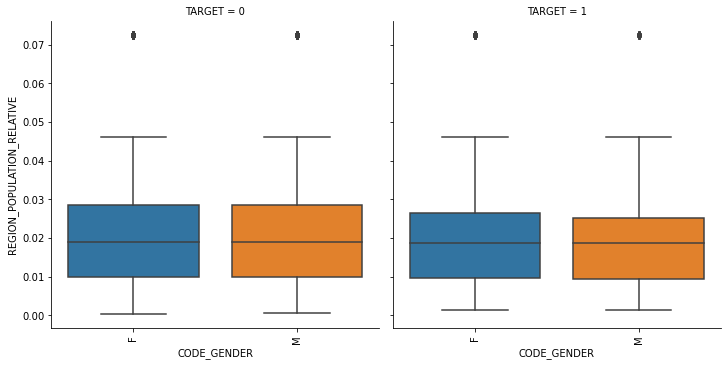

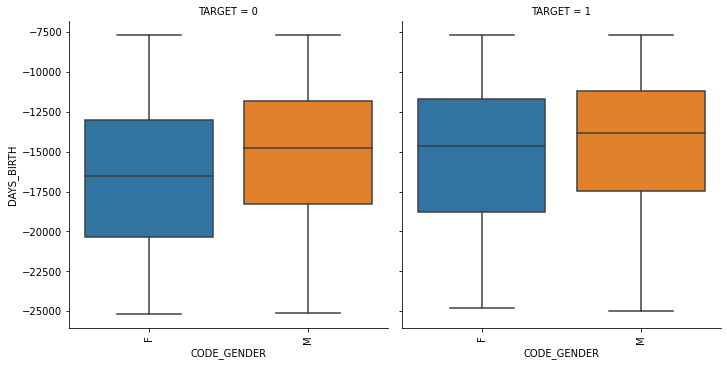

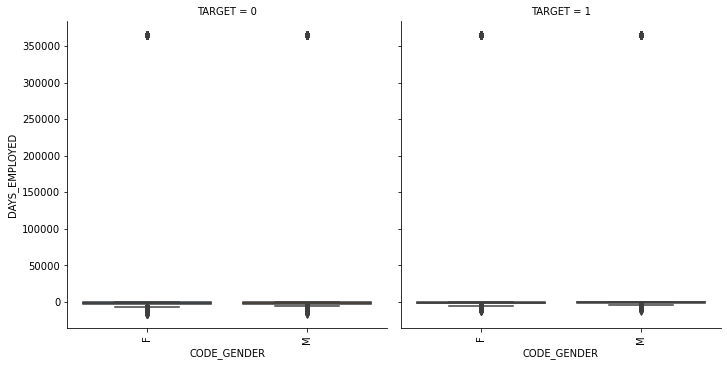

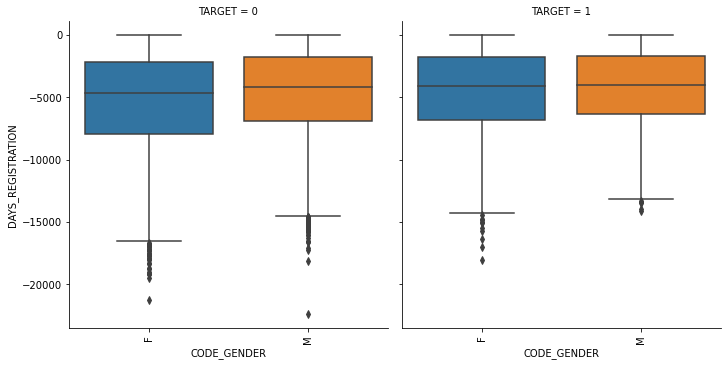

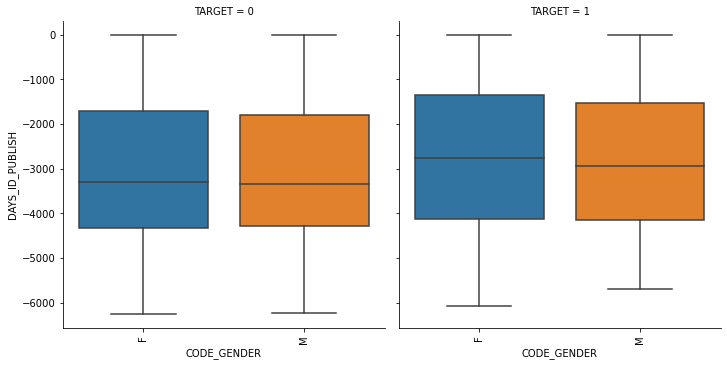

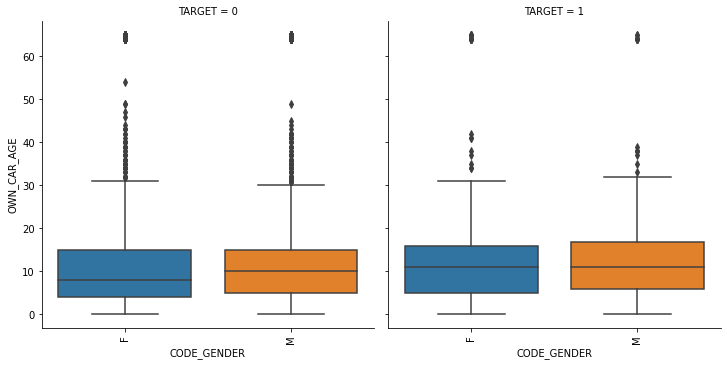

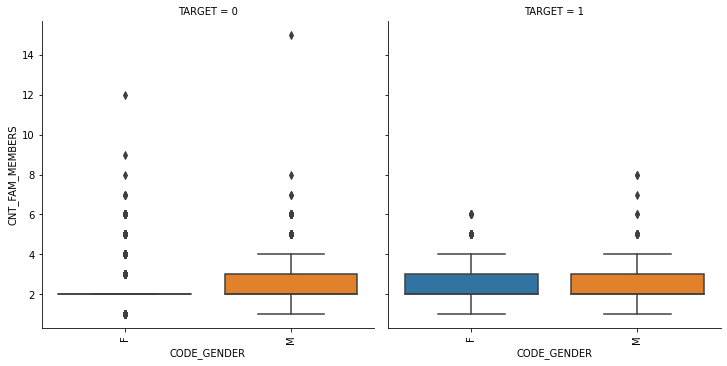

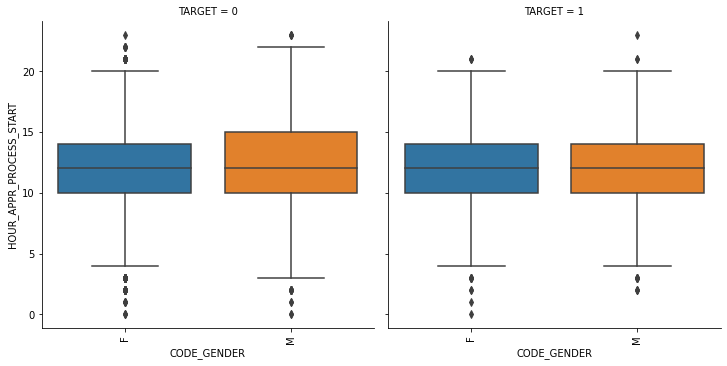

In [82]:
#Target vs num_region_cols vs gender_cols
num_vs_cat_vs_target_plot(num_region_cols,gender_cols)